# A. PROBLEM STATEMENT

  Pandemi COVID-19 telah berlangsung selama 2 tahun lebih dan memiliki
dampak sangat signifikan terhadap berbagai sektor secara global, termasuk di Indonesia. COVID-19 adalah penyakit pernapasan yang disebabkan oleh virus baru. Gejalanya meliputi demam, batuk, sakit tenggorokan, dan sesak napas. Virus ini dapat menyebar dari orang ke orang. Tercatat bahwa COVID-19 mengalami tingkat pertumbuhan eksponensial di berbagai dunia. Maka dari itu sangatlah
dibutuhkan pengambilan keputusan (strategis & operasional) berbasis data,
sehingga kebijakan dan keputusan yang dipilih adalah yang paling baik dan
relevan, baik itu oleh pemerintah, industri, dan masyarakat. 

  Berdasarkan masalah tersebut, kami membuat notebook ini dengan tujuan sebagai berikut.
  
  1. Mempelajari trend wabah COVID-19 terkhusus di Jakarta dan keseluruhan Indonesia dengan bantuan beberapa teknik visualisasi dasar. 
  
  2. Mempelajari perkembangan vaksinasi COVID-19 dan korelasinya terhadap penanggulangan wabah COVID-19 dengan bantuan beberapa teknik visualisasi dasar.

  3. Menentukan model terbaik untuk memprediksi perkembangan COVID-19.

  4. Melakukan prediksi dan time series forecasting untuk memprediksi perkembangan COVID-19 untuk beberapa waktu ke depan.

# B. DATA CLEANING & PREPROCESSING

## Library yang Dipakai



In [ ]:
# Import Library
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams.update({'font.size' : 18, 'font.family' : 'STIXGeneral', 'mathtext.fontset' : 'stix'})

import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV as gscv
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from scipy import stats
from sklearn.ensemble import StackingRegressor
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# Import Library Forecasting
from sklearn.linear_model import LinearRegression,Ridge,Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
from fbprophet import Prophet
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.stattools import adfuller
from sklearn.ensemble import RandomForestRegressor
std=StandardScaler()

# import library savgol agar hasil graph lebih smooth
from scipy.signal import savgol_filter


## Dataset yang Dipakai

In [ ]:
# Process Date Function
# tanggal yang dijadikan base adalah tanggal 2020 - 03 - 02 karena merupakan tanggal dimana covid baru mulai masuk ke Indonesia
def totalDaysFromBase(date : datetime):
  base = "2020-03-02"
  # dari ketiga dataset, tiap date di format YYYY-MM-DD
  base_date = pd.to_datetime(arg = base, yearfirst=True, format = '%Y-%m-%d')
  totalDays = (date - base_date).days
  return totalDays


In [ ]:
f = lambda x : totalDaysFromBase(x) # function expression untuk konvert ke jumlah hari dari base




###Import data mengenai Covid-19 di Indonesia dan Jakarta

In [ ]:
df_covid_data = pd.read_excel("Daily Update Data Agregat Covid-19 Jakarta.xlsx", sheet_name = "Data Indonesia dan Jakarta")[2:]

In [ ]:
df_covid_data.head()

,Tanggal,Positif (Indonesia),Dirawat (Indonesia),Sembuh (Indonesia),Meninggal (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),...,Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh Harian (Indonesia),Meninggal Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
2,2020-03-02,2,2,0,0,0,0,0,0,0,...,2,2,0,0,0,0,0,0,0,0
3,2020-03-03,2,2,0,0,1,0,0,2,3,...,0,0,0,0,1,0,0,2,3,2
4,2020-03-04,2,2,0,0,1,0,0,2,3,...,0,0,0,0,0,0,0,0,0,0
5,2020-03-05,2,2,0,0,3,0,0,4,7,...,0,0,0,0,2,0,0,2,4,2
6,2020-03-06,4,4,0,0,3,0,0,4,7,...,2,2,0,0,0,0,0,0,0,0


In [ ]:
df_covid_data.dtypes

Tanggal                            datetime64[ns]
Positif (Indonesia)                         int64
Dirawat (Indonesia)                         int64
Sembuh (Indonesia)                          int64
Meninggal (Indonesia)                       int64
Meninggal (Jakarta)                         int64
Sembuh (Jakarta)                            int64
Self-Isolation (Jakarta)                    int64
Dirawat (Jakarta)                           int64
Positif (Jakarta)                           int64
Positif Aktif (Jakarta)                     int64
Positif Harian (Indonesia)                  int64
Dirawat Harian (Indonesia)                  int64
Sembuh Harian (Indonesia)                   int64
Meninggal Harian (Indonesia)                int64
Meninggal Harian (Jakarta)                  int64
Sembuh Harian (Jakarta)                     int64
Self-Isolation Harian (Jakarta)             int64
Dirawat Harian (Jakarta)                    int64
Positif Harian (Jakarta)                    int64


In [ ]:
df_covid_data["Tanggal"]

2     2020-03-02
3     2020-03-03
4     2020-03-04
5     2020-03-05
6     2020-03-06
         ...    
844   2022-06-22
845   2022-06-23
846   2022-06-24
847   2022-06-25
848   2022-06-26
Name: Tanggal, Length: 847, dtype: datetime64[ns]

In [ ]:
# process tanggal
df_covid_data["Tanggal"] = df_covid_data["Tanggal"].apply(f)

###Import data mengenai Vaksinasi Covid-19 di Indonesia dan Jakarta

In [ ]:
# vaksinasi jakarta

df_vaksinasi_data_jkt = pd.read_excel("Data Vaksinasi Reformatted.xlsx", sheet_name = "DKI Jakarta")

In [ ]:
df_vaksinasi_data_jkt.columns

Index(['Tanggal', 'Target Vaksinasi Tenaga Kesehatan',
       'Vaksinasi 1 Tenaga Kesehatan', 'Vaksinasi 2 Tenaga Kesehatan',
       'Persentase 1 Tenaga Kesehatan', 'Persentase 2 Tenaga Kesehatan',
       'Target Vaksinasi Lansia', 'Vaksinasi 1 Lansia', 'Vaksinasi 2 Lansia',
       'Persentase 1 Lansia', 'Persentase 2 Lansia',
       'Target Vaksinasi Pelayan Publik', 'Vaksinasi 1 Pelayan Publik',
       'Vaksinasi 2 Pelayan Publik', 'Persentase 1 Pelayan Publik',
       'Persentase 2 Pelayan Publik', 'Target Vaksinasi Total ',
       'Vaksinasi 1 Total ', 'Vaksinasi 2 Total ', 'Persentase 1 Total ',
       'Persentase 2 Total', 'Vaksinasi 1 Harian', 'Vaksinasi 2 Harian',
       'Target Vaksinasi 18 - 59 Tahun', 'Vaksinasi 1 18 - 59 Tahun',
       'Vaksinasi 2 18 - 59 Tahun', 'Persentase 1 18 - 59 Tahun',
       'Persentase 2 18 - 59 Tahun', 'Target Vaksinasi 12 - 17 Tahun',
       'Vaksinasi 1 12 - 17 Tahun', 'Vaksinasi 2 12 - 17 Tahun',
       'Persentase 1 12 - 17 Tahun', 'Persenta

In [ ]:
# buang kolom yang tidak penting
list_kolom_tidak_penting = [
                            "Target Vaksinasi Tenaga Kesehatan", "Persentase 1 Tenaga Kesehatan", "Persentase 2 Tenaga Kesehatan", 
                            "Target Vaksinasi Tenaga Kesehatan", "Persentase 1 Tenaga Kesehatan", "Persentase 2 Tenaga Kesehatan", 
                            "Target Vaksinasi Lansia", "Persentase 1 Lansia", "Persentase 2 Lansia",
                            'Target Vaksinasi Pelayan Publik', 'Persentase 1 Pelayan Publik', 'Persentase 2 Pelayan Publik', 
                            'Target Vaksinasi 18 - 59 Tahun', 'Persentase 1 18 - 59 Tahun', 'Persentase 2 18 - 59 Tahun', 
                            'Target Vaksinasi 12 - 17 Tahun', 'Persentase 1 12 - 17 Tahun', 'Persentase 2 12 - 17 Tahun',
                            'Target Vaksinasi Total ', 'Persentase 1 Total ', 'Persentase 2 Total', 'Target Vaksinasi 6 - 11 Tahun ',
                            'Persentase 1 6 - 11 Tahun ',  'Persentase 2 6 - 11 Tahun ', 
                            'KTP Non - DKI Dosis 1', '% KTP Non - DKI Dosis 1', 'KTP Non - DKI  Dosis 2', '% KTP Non - DKI Dosis 2', 
                            '% Cakupan KTP DKI Dosis 1', '% Cakupan KTP DKI Dosis 2', 
                            
]


In [ ]:
df_vaksinasi_data_jkt.drop(list_kolom_tidak_penting, axis = 1, inplace=True)

In [ ]:
# remove whitespaces in colm names
df_vaksinasi_data_jkt.columns = map(lambda x: x.strip(), df_vaksinasi_data_jkt.columns)

In [ ]:
df_vaksinasi_data_jkt.columns

Index(['Tanggal', 'Vaksinasi 1 Tenaga Kesehatan',
       'Vaksinasi 2 Tenaga Kesehatan', 'Vaksinasi 1 Lansia',
       'Vaksinasi 2 Lansia', 'Vaksinasi 1 Pelayan Publik',
       'Vaksinasi 2 Pelayan Publik', 'Vaksinasi 1 Total', 'Vaksinasi 2 Total',
       'Vaksinasi 1 Harian', 'Vaksinasi 2 Harian', 'Vaksinasi 1 18 - 59 Tahun',
       'Vaksinasi 2 18 - 59 Tahun', 'Vaksinasi 1 12 - 17 Tahun',
       'Vaksinasi 2 12 - 17 Tahun', 'Vaksinasi 1 6 - 11 Tahun',
       'Vaksinasi 2 6 - 11 Tahun', 'KTP DKI Dosis 1', '% KTP DKI Dosis 1',
       'KTP DKI Dosis 2', '% KTP DKI Dosis 2'],
      dtype='object')

In [ ]:
# vaksinasi Indonesia
df_vaksinasi_data_idn = pd.read_excel("Data Vaksinasi Reformatted.xlsx", sheet_name = "Indonesia")

In [ ]:
df_vaksinasi_data_idn.head()

,Tanggal,Target Vaksinasi Tenaga Kesehatan,Vaksinasi 1 Tenaga Kesehatan,Vaksinasi 2 Tenaga Kesehatan,Persentase 1 Tenaga Kesehatan,Persentase 2 Tenaga Kesehatan,Target Vaksinasi Lansia,Vaksinasi 1 Lansia,Vaksinasi 2 Lansia,Persentase 1 Lansia,...,Target Vaksinasi 18 - 59 Tahun,Vaksinasi 1 18 - 59 Tahun,Vaksinasi 2 18 - 59 Tahun,Persentase 1 18 - 59 Tahun,Persentase 2 18 - 59 Tahun,Target Vaksinasi 12 - 17 Tahun,Vaksinasi 1 12 - 17 Tahun,Vaksinasi 2 12 - 17 Tahun,Persentase 1 12 - 17 Tahun,Persentase 2 12 - 17 Tahun
0,2021-03-05,1468764,1692016,1111938,1.152000,0.757057,21553118,179711,2,0.008338,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-03-06,1468764,1741784,1126353,1.185884,0.766871,21553118,206025,2,0.009559,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-03-07,1468764,2049651,1129340,1.395494,0.768905,21553118,215632,2,0.010005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-03-08,1468764,2114655,1149547,1.439751,0.782663,21553118,267603,5,0.012416,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-03-09,1468764,1395498,1127633,0.950117,0.767743,21553118,430591,1612,0.019978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
list_kolom_tidak_penting = [
                            "Target Vaksinasi Tenaga Kesehatan", "Persentase 1 Tenaga Kesehatan", "Persentase 2 Tenaga Kesehatan", 
                            "Target Vaksinasi Tenaga Kesehatan", "Persentase 1 Tenaga Kesehatan", "Persentase 2 Tenaga Kesehatan", 
                            "Target Vaksinasi Lansia", "Persentase 1 Lansia", "Persentase 2 Lansia",
                            'Target Vaksinasi Pelayan Publik', 'Persentase 1 Pelayan Publik', 'Persentase 2 Pelayan Publik', 
                            'Target Vaksinasi 18 - 59 Tahun', 'Persentase 1 18 - 59 Tahun', 'Persentase 2 18 - 59 Tahun', 
                            'Target Vaksinasi 12 - 17 Tahun', 'Persentase 1 12 - 17 Tahun', 'Persentase 2 12 - 17 Tahun',
                            'Target Vaksinasi Total ', 'Persentase 1 Total ', 'Persentase 2 Total'
]

In [ ]:
# hapus kolom yang tidak penting
df_vaksinasi_data_idn.drop(list_kolom_tidak_penting, axis = 1, inplace=True)

In [ ]:
# remove whitespaces in colm names
df_vaksinasi_data_idn.columns = map(lambda x: x.strip(), df_vaksinasi_data_idn.columns)

In [ ]:
df_vaksinasi_data_idn.columns

Index(['Tanggal', 'Vaksinasi 1 Tenaga Kesehatan',
       'Vaksinasi 2 Tenaga Kesehatan', 'Vaksinasi 1 Lansia',
       'Vaksinasi 2 Lansia', 'Vaksinasi 1 Pelayan Publik',
       'Vaksinasi 2 Pelayan Publik', 'Vaksinasi 1 Total', 'Vaksinasi 2 Total',
       'Vaksinasi 1 Harian', 'Vaksinasi 2 Harian', 'Vaksinasi 1 18 - 59 Tahun',
       'Vaksinasi 2 18 - 59 Tahun', 'Vaksinasi 1 12 - 17 Tahun',
       'Vaksinasi 2 12 - 17 Tahun'],
      dtype='object')

In [ ]:
# process tanggal
df_vaksinasi_data_jkt["Tanggal"] = df_vaksinasi_data_jkt["Tanggal"].apply(f)
df_vaksinasi_data_idn["Tanggal"] = df_vaksinasi_data_idn["Tanggal"].apply(f)

#### Process Missing Value 


##### Vaksinasi Data JKT

In [ ]:
# lihat data yang kosong pada jakarta
df_vaksinasi_data_jkt.isna().sum()

Tanggal                           0
Vaksinasi 1 Tenaga Kesehatan      0
Vaksinasi 2 Tenaga Kesehatan      0
Vaksinasi 1 Lansia                0
Vaksinasi 2 Lansia                0
Vaksinasi 1 Pelayan Publik        0
Vaksinasi 2 Pelayan Publik        0
Vaksinasi 1 Total                 0
Vaksinasi 2 Total                 0
Vaksinasi 1 Harian              101
Vaksinasi 2 Harian              105
Vaksinasi 1 18 - 59 Tahun       105
Vaksinasi 2 18 - 59 Tahun       105
Vaksinasi 1 12 - 17 Tahun       118
Vaksinasi 2 12 - 17 Tahun       118
Vaksinasi 1 6 - 11 Tahun        290
Vaksinasi 2 6 - 11 Tahun        290
KTP DKI Dosis 1                 192
% KTP DKI Dosis 1               192
KTP DKI Dosis 2                 192
% KTP DKI Dosis 2               192
dtype: int64

In [ ]:
# metode pengisian nilai kosong pada vaksinasi 
# untuk kolom vaksinasi harian / vaksinasi 18 - 59 / vaksinasi 12 - 17 / dan vaksinasi 6 - 11 diasumsikan kosong karena saat itu belum ada orang yang divaksinasi pada kategori tersebut (di luar dari tenaga kesehatan/lansia/pelayan publik)
set_to_zero_colm = [
                    'Vaksinasi 1 Harian', 'Vaksinasi 2 Harian',
                    'Vaksinasi 1 18 - 59 Tahun', 'Vaksinasi 2 18 - 59 Tahun',
                    'Vaksinasi 1 12 - 17 Tahun', 'Vaksinasi 2 12 - 17 Tahun',
                    'Vaksinasi 1 6 - 11 Tahun', 'Vaksinasi 2 6 - 11 Tahun'
]

In [ ]:
# ubah nilai kosong ke 0
for colm in set_to_zero_colm:
  df_vaksinasi_data_jkt[colm].fillna(0,inplace=True)

In [ ]:
# pengisian nilai kosong pada %KTP
df_vaksinasi_data_jkt["% KTP DKI Dosis 1"][:192] # data NaN terjadi pada 192 Data Pertama

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
187   NaN
188   NaN
189   NaN
190   NaN
191   NaN
Name: % KTP DKI Dosis 1, Length: 192, dtype: float64

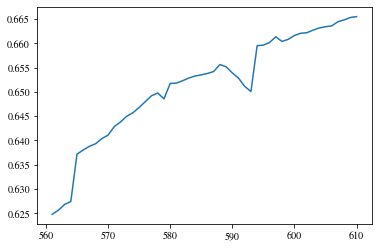

In [ ]:
plt.plot(df_vaksinasi_data_jkt["Tanggal"][193:243], df_vaksinasi_data_jkt["% KTP DKI Dosis 1"][193:243]) # persentase selalu naik
# sedangkan mean dan median dari % ktp berkisar di 0.69 = 0.70, sehingga penggunaan mean/median tidak cocok untuk pengisian nilai kosong

In [ ]:
y = df_vaksinasi_data_jkt["% KTP DKI Dosis 1"][193:].to_numpy()
x = df_vaksinasi_data_jkt["Tanggal"][193:].to_numpy()

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(x.reshape(-1, 1), y.reshape(-1, 1))

RandomForestRegressor()

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, x.reshape(-1, 1), y.reshape(-1, 1), scoring = 'neg_mean_absolute_error', cv = 15)
rmse = np.sqrt(-scores)

In [ ]:
rmse.mean() / 0.7 * 100 # perkiraan memiliki error sebesar 5 persen -> dapat digunakan untuk memprediksi nan value

5.874318924424966

In [ ]:
x_nan = df_vaksinasi_data_jkt["Tanggal"][:192].to_numpy().reshape(-1, 1)

In [ ]:
pred = rf.predict(x_nan)

In [ ]:
df_vaksinasi_data_jkt["% KTP DKI Dosis 1"][:192] = pred
df_vaksinasi_data_jkt["% KTP DKI Dosis 1"][:192] = pred

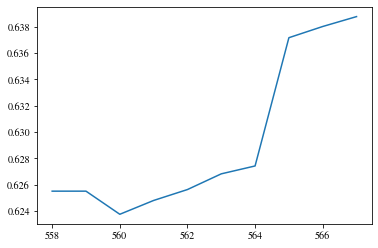

In [ ]:
plt.plot(df_vaksinasi_data_jkt["Tanggal"][190:200], df_vaksinasi_data_jkt["% KTP DKI Dosis 1"][190:200])


In [ ]:
# cari jumlah ktp dki dari persentase
df_vaksinasi_data_jkt["KTP DKI Dosis 1"][:192] = df_vaksinasi_data_jkt["Vaksinasi 1 Total"][:192] * df_vaksinasi_data_jkt["% KTP DKI Dosis 1"][:192]

In [ ]:
y = df_vaksinasi_data_jkt["% KTP DKI Dosis 2"][193:].to_numpy()

In [ ]:
rf.fit(x.reshape(-1, 1), y.reshape(-1, 1))

RandomForestRegressor()

In [ ]:
pred = rf.predict(x_nan)

In [ ]:
df_vaksinasi_data_jkt["% KTP DKI Dosis 2"][:192] = pred

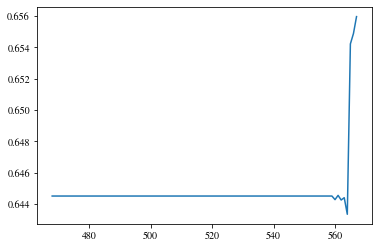

In [ ]:
plt.plot(df_vaksinasi_data_jkt["Tanggal"][100:200], df_vaksinasi_data_jkt["% KTP DKI Dosis 2"][100:200])

In [ ]:
df_vaksinasi_data_jkt["KTP DKI Dosis 2"][:192] = df_vaksinasi_data_jkt["Vaksinasi 2 Total"][:192] * df_vaksinasi_data_jkt["% KTP DKI Dosis 2"][:192]

In [ ]:
df_vaksinasi_data_jkt.isna().sum() # data telah dibersihkan

Tanggal                         0
Vaksinasi 1 Tenaga Kesehatan    0
Vaksinasi 2 Tenaga Kesehatan    0
Vaksinasi 1 Lansia              0
Vaksinasi 2 Lansia              0
Vaksinasi 1 Pelayan Publik      0
Vaksinasi 2 Pelayan Publik      0
Vaksinasi 1 Total               0
Vaksinasi 2 Total               0
Vaksinasi 1 Harian              0
Vaksinasi 2 Harian              0
Vaksinasi 1 18 - 59 Tahun       0
Vaksinasi 2 18 - 59 Tahun       0
Vaksinasi 1 12 - 17 Tahun       0
Vaksinasi 2 12 - 17 Tahun       0
Vaksinasi 1 6 - 11 Tahun        0
Vaksinasi 2 6 - 11 Tahun        0
KTP DKI Dosis 1                 0
% KTP DKI Dosis 1               0
KTP DKI Dosis 2                 0
% KTP DKI Dosis 2               0
dtype: int64

In [ ]:
np.shape(df_vaksinasi_data_jkt)

(479, 21)

In [ ]:
# stack data dengan nilai 0 supaya dimensi sesuai dengan dataset yang lain, yaitu data mulai dari tanggal base
temp = np.array([0 for i in range(368)]).reshape(-1, 1)
tanggal = np.array([i for i in range(368)]).reshape(-1, 1)
temp = np.hstack([tanggal] + [temp for i in range(20)])

In [ ]:
colmn = df_vaksinasi_data_jkt.columns
df_vaksinasi_data_jkt = np.vstack([temp, df_vaksinasi_data_jkt])

In [ ]:
df_vaksinasi_data_jkt = pd.DataFrame(df_vaksinasi_data_jkt)
df_vaksinasi_data_jkt.columns = colmn

##### Vaksinasi Data IDN

In [ ]:
# lihat data yang kosong pada jakarta
df_vaksinasi_data_idn.isna().sum()

Tanggal                           0
Vaksinasi 1 Tenaga Kesehatan      0
Vaksinasi 2 Tenaga Kesehatan      0
Vaksinasi 1 Lansia                0
Vaksinasi 2 Lansia                0
Vaksinasi 1 Pelayan Publik        0
Vaksinasi 2 Pelayan Publik        0
Vaksinasi 1 Total                 0
Vaksinasi 2 Total                 0
Vaksinasi 1 Harian              105
Vaksinasi 2 Harian              105
Vaksinasi 1 18 - 59 Tahun       112
Vaksinasi 2 18 - 59 Tahun       114
Vaksinasi 1 12 - 17 Tahun       125
Vaksinasi 2 12 - 17 Tahun       127
dtype: int64

In [ ]:
# metode pengisian nilai kosong pada vaksinasi 
# untuk kolom vaksinasi harian / vaksinasi 18 - 59 / vaksinasi 12 - 17 / dan vaksinasi 6 - 11 diasumsikan kosong karena saat itu belum ada orang yang divaksinasi pada kategori tersebut (di luar dari tenaga kesehatan/lansia/pelayan publik)
set_to_zero_colm = [
                    'Vaksinasi 1 Harian', 'Vaksinasi 2 Harian',
                    'Vaksinasi 1 18 - 59 Tahun', 'Vaksinasi 2 18 - 59 Tahun',
                    'Vaksinasi 1 12 - 17 Tahun', 'Vaksinasi 2 12 - 17 Tahun',
]

In [ ]:
# ubah nilai kosong ke 0
for colm in set_to_zero_colm:
  df_vaksinasi_data_idn[colm].fillna(0,inplace=True)

In [ ]:
# lihat data yang kosong pada jakarta
df_vaksinasi_data_idn.isna().sum()

Tanggal                         0
Vaksinasi 1 Tenaga Kesehatan    0
Vaksinasi 2 Tenaga Kesehatan    0
Vaksinasi 1 Lansia              0
Vaksinasi 2 Lansia              0
Vaksinasi 1 Pelayan Publik      0
Vaksinasi 2 Pelayan Publik      0
Vaksinasi 1 Total               0
Vaksinasi 2 Total               0
Vaksinasi 1 Harian              0
Vaksinasi 2 Harian              0
Vaksinasi 1 18 - 59 Tahun       0
Vaksinasi 2 18 - 59 Tahun       0
Vaksinasi 1 12 - 17 Tahun       0
Vaksinasi 2 12 - 17 Tahun       0
dtype: int64

In [ ]:
np.shape(df_vaksinasi_data_idn)

(479, 15)

In [ ]:
temp = np.array([0 for i in range(368)]).reshape(-1, 1)
tanggal = np.array([i for i in range(368)]).reshape(-1, 1)
temp = np.hstack([tanggal] + [temp for i in range(14)])

In [ ]:
colmn = df_vaksinasi_data_idn.columns
df_vaksinasi_data_idn = np.vstack([temp, df_vaksinasi_data_idn])


In [ ]:
df_vaksinasi_data_idn = pd.DataFrame(df_vaksinasi_data_idn)
df_vaksinasi_data_idn.columns = colmn

### Import data mengenai mobilitas di Indonesia

In [ ]:
df_mobility_data_2020 = pd.read_csv("2020_ID_Region_Mobility_Report.csv")
df_mobility_data_2021 = pd.read_csv("2021_ID_Region_Mobility_Report.csv")
df_mobility_data_2022 = pd.read_csv("2022_ID_Region_Mobility_Report.csv")

In [ ]:
df_mobility_data = np.vstack([df_mobility_data_2020, df_mobility_data_2021, df_mobility_data_2022])
df_mobility_data = pd.DataFrame(df_mobility_data)[16:]
df_mobility_data.columns = df_mobility_data_2021.columns

In [ ]:
df_mobility_data.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
16,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2020-03-02,5.0,12.0,0.0,3.0,5,0
17,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2020-03-03,3.0,10.0,-2.0,2.0,5,0
18,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2020-03-04,0.0,4.0,-5.0,-1.0,4,1
19,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2020-03-05,4.0,8.0,-1.0,3.0,4,0
20,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2020-03-06,2.0,4.0,-3.0,3.0,6,1


In [ ]:
df_mobility_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30259 entries, 16 to 30274
Data columns (total 15 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   country_region_code                                 30259 non-null  object
 1   country_region                                      30259 non-null  object
 2   sub_region_1                                        29410 non-null  object
 3   sub_region_2                                        0 non-null      object
 4   metro_area                                          0 non-null      object
 5   iso_3166_2_code                                     29410 non-null  object
 6   census_fips_code                                    0 non-null      object
 7   place_id                                            30259 non-null  object
 8   date                                                30259 non-null  object
 9   retai

In [ ]:
# ubah tipe nilai numerik
colms_mobilisasi = [
                    'retail_and_recreation_percent_change_from_baseline',
                    'grocery_and_pharmacy_percent_change_from_baseline',
                    'parks_percent_change_from_baseline',
                    'transit_stations_percent_change_from_baseline',
                    'workplaces_percent_change_from_baseline',
                    'residential_percent_change_from_baseline'                
]

df_mobility_data = df_mobility_data.apply(pd.to_numeric, errors = "ignore")

In [ ]:
# checking missing values

df_mobility_data.isna().sum()

country_region_code                                       0
country_region                                            0
sub_region_1                                            849
sub_region_2                                          30259
metro_area                                            30259
iso_3166_2_code                                         849
census_fips_code                                      30259
place_id                                                  0
date                                                      0
retail_and_recreation_percent_change_from_baseline       50
grocery_and_pharmacy_percent_change_from_baseline        99
parks_percent_change_from_baseline                      118
transit_stations_percent_change_from_baseline           845
workplaces_percent_change_from_baseline                   0
residential_percent_change_from_baseline                  0
dtype: int64

In [ ]:
# handling missing values -> drop 

# make a copy
df_mobility_data_copy = df_mobility_data.copy()

# drop kolom dengan keseluruhan isi nan
# kolom sub_region_2, metro_area, dan census_fips_code
df_mobility_data_copy = df_mobility_data_copy.drop(['sub_region_2','metro_area', 
                                                    'census_fips_code'], axis=1)

# drop kolom yang tidak diperlukan (country_region_code, country_region -> seluruhnya isinya sama, iso_3166_2_code, dan place_id)
df_mobility_data_copy = df_mobility_data_copy.drop(['country_region_code', 'country_region', 'iso_3166_2_code', 'place_id'], axis=1)
df_mobility_data_copy.isna().sum()


sub_region_1                                          849
date                                                    0
retail_and_recreation_percent_change_from_baseline     50
grocery_and_pharmacy_percent_change_from_baseline      99
parks_percent_change_from_baseline                    118
transit_stations_percent_change_from_baseline         845
workplaces_percent_change_from_baseline                 0
residential_percent_change_from_baseline                0
dtype: int64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


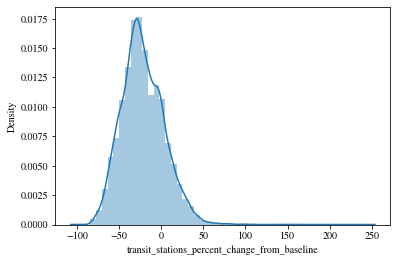

In [ ]:
# handling missing values -> fill

# kolom dengan missing values bertipe numerik -> transit_stations_percent_change_from_baseline
# checking distribution

sns.distplot(df_mobility_data_copy['transit_stations_percent_change_from_baseline'])

In [ ]:
# terlihat bahwa distibusi kolom tersebut normal, maka missing values diisi dengan nilai mean

mean = df_mobility_data_copy['transit_stations_percent_change_from_baseline'].mean()
mean_rounded = round(mean,0)
df_mobility_data_copy['transit_stations_percent_change_from_baseline'].fillna(mean_rounded,inplace=True)
df_mobility_data_copy['transit_stations_percent_change_from_baseline'].isna().sum()

0

In [ ]:
# handling missing values -> fill

# kolom missing values berupa kategorikal -> sub region 1
# fill dengan nilai modus

df_mobility_data_copy['sub_region_1'].fillna(df_mobility_data_copy['sub_region_1'].mode()[0], inplace=True)
df_mobility_data_copy['sub_region_1'].isna().sum()

0

In [ ]:
df_mobility_data_copy.columns

Index(['sub_region_1', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

In [ ]:
# data mobilitas jakarta

jakarta_mobility = df_mobility_data_copy[df_mobility_data_copy['sub_region_1']=='Jakarta']

In [ ]:
# groupby baseline berdasarkan tanggal untuk merepresentassikan baseline keseluruhan di Indonesia

df_mobility_baseline = df_mobility_data_copy.drop(['date','sub_region_1'], axis=1)

indo_mobility = df_mobility_data_copy.groupby(['date'])[df_mobility_baseline.columns].mean()
indo_mobility = indo_mobility.reset_index() 
indo_mobility

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2020-02-15,-1.029412,-1.235294,-2.647059,-1.705882,5.794118,0.705882
1,2020-02-16,-1.088235,-1.382353,-2.941176,-1.441176,2.352941,1.294118
2,2020-02-17,-3.529412,-3.764706,-5.352941,-2.558824,3.352941,1.294118
3,2020-02-18,-2.735294,-2.176471,-2.588235,-1.500000,2.176471,1.176471
4,2020-02-19,-3.970588,-4.000000,-2.205882,-2.205882,1.088235,1.176471
...,...,...,...,...,...,...,...
860,2022-06-24,17.171429,44.800000,57.657143,4.257143,10.942857,14.885714
861,2022-06-25,14.971429,43.600000,54.085714,6.571429,19.914286,13.057143
862,2022-06-26,15.771429,42.942857,57.571429,6.457143,30.028571,13.057143
863,2022-06-27,18.800000,45.142857,70.057143,7.714286,5.857143,15.000000


In [ ]:
# ubah mobility data ke datetime
indo_mobility["date"] = pd.to_datetime(arg = indo_mobility["date"], yearfirst=True, format='%Y-%m-%d')
jakarta_mobility["date"] = pd.to_datetime(arg = jakarta_mobility["date"], yearfirst=True, format='%Y-%m-%d')

In [ ]:
# ubah tiap tanggal ke integer
indo_mobility["date"] = indo_mobility["date"].apply(f)
jakarta_mobility["date"] = jakarta_mobility["date"].apply(f)


# C. EXPLORATORY DATA ANALYSIS

## Data Covid Indonesia Dan Jakarta (df_covid_data)


### Dataset General Information


In [ ]:
df_covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 2 to 848
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Tanggal                          847 non-null    int64
 1   Positif (Indonesia)              847 non-null    int64
 2   Dirawat (Indonesia)              847 non-null    int64
 3   Sembuh (Indonesia)               847 non-null    int64
 4   Meninggal (Indonesia)            847 non-null    int64
 5   Meninggal (Jakarta)              847 non-null    int64
 6   Sembuh (Jakarta)                 847 non-null    int64
 7   Self-Isolation (Jakarta)         847 non-null    int64
 8   Dirawat (Jakarta)                847 non-null    int64
 9   Positif (Jakarta)                847 non-null    int64
 10  Positif Aktif (Jakarta)          847 non-null    int64
 11  Positif Harian (Indonesia)       847 non-null    int64
 12  Dirawat Harian (Indonesia)       847 non-null    i

Terlihat bahwa data memiliki 849 baris dan tidak ada data yang kosong tidak perlu dilakukan data cleaning dan preprocessing

In [ ]:
# melihat statistik umum dari data
df_covid_data.describe()

,Tanggal,Positif (Indonesia),Dirawat (Indonesia),Sembuh (Indonesia),Meninggal (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),...,Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh Harian (Indonesia),Meninggal Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
count,847.000000,8.470000e+02,847.000000,8.470000e+02,847.000000,847.000000,8.470000e+02,847.000000,847.000000,8.470000e+02,...,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000
mean,423.000000,2.394008e+06,102778.336482,2.220808e+06,70420.948052,7592.724911,4.960211e+05,9098.824085,3447.099174,5.161597e+05,...,7178.808737,17.138135,6976.644628,185.025974,18.079103,1465.677686,9.363636,0.697757,1493.818182,10.061393
std,244.652134,2.168792e+06,133522.793827,2.083308e+06,62483.962673,5764.521841,4.358625e+05,15170.676312,4763.449338,4.436524e+05,...,11489.896240,6663.149172,10573.516105,323.964091,27.988678,2752.563992,1424.555811,630.023962,2530.259372,1723.161343
min,0.000000,2.000000e+00,2.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,-29938.000000,0.000000,0.000000,0.000000,0.000000,-11310.000000,-11568.000000,0.000000,-12107.000000
25%,211.500000,2.848660e+05,11774.000000,2.126920e+05,10670.500000,1724.500000,5.959250e+04,1326.500000,508.000000,7.383850e+04,...,618.500000,-751.000000,544.000000,21.000000,2.000000,122.500000,-116.500000,-62.000000,131.000000,-142.000000
50%,423.000000,1.662868e+06,59453.000000,1.517432e+06,45334.000000,6710.000000,3.944030e+05,4201.000000,2207.000000,4.078310e+05,...,3373.000000,75.000000,3560.000000,89.000000,11.000000,606.000000,10.000000,1.000000,659.000000,17.000000
75%,634.500000,4.255470e+06,124081.000000,4.103509e+06,143801.500000,13576.000000,8.497360e+05,8731.500000,3976.000000,8.637840e+05,...,6786.500000,607.000000,7287.500000,182.500000,22.000000,1305.000000,161.000000,71.500000,1427.500000,171.500000
max,846.000000,6.080451e+06,586113.000000,5.909218e+06,156717.000000,15313.000000,1.241429e+06,88295.000000,30418.000000,1.265264e+06,...,64718.000000,39165.000000,61361.000000,2069.000000,265.000000,20570.000000,8153.000000,2812.000000,15825.000000,10126.000000


In [ ]:
df_covid_data.columns


Index(['Tanggal', 'Positif (Indonesia)', 'Dirawat (Indonesia)',
       'Sembuh (Indonesia)', 'Meninggal (Indonesia)', 'Meninggal (Jakarta)',
       'Sembuh (Jakarta)', 'Self-Isolation (Jakarta)', 'Dirawat (Jakarta)',
       'Positif (Jakarta)', 'Positif Aktif (Jakarta)',
       'Positif Harian (Indonesia)', 'Dirawat Harian (Indonesia)',
       'Sembuh Harian (Indonesia)', 'Meninggal Harian (Indonesia)',
       'Meninggal Harian (Jakarta)', 'Sembuh Harian (Jakarta)',
       'Self-Isolation Harian (Jakarta)', 'Dirawat Harian (Jakarta)',
       'Positif Harian (Jakarta)', 'Positif Aktif Harian (Jakarta)'],
      dtype='object')

Akan berfokus pada kolom positif, sembuh, dan meninggal

### EDA df_covid_data

In [ ]:
def smoothenGraph(ys, window = 21, order = 2):
  # Reduce the noise in the graph using savgol filger
  for (i, y) in enumerate(ys):
    ys[i] = savgol_filter(y, window, order)

  return ys

In [ ]:
# Read Data From DF
# x value
list_x = df_covid_data['Tanggal']
# y value
y11, y12 = df_covid_data['Positif Harian (Indonesia)'], df_covid_data['Positif Harian (Jakarta)']
y21, y22 = df_covid_data['Positif (Indonesia)'], df_covid_data['Positif (Jakarta)']
y31, y32 = df_covid_data['Sembuh Harian (Indonesia)'], df_covid_data['Sembuh Harian (Jakarta)']
y41, y42 = df_covid_data['Sembuh (Indonesia)'], df_covid_data['Sembuh (Jakarta)']
y51, y52 = df_covid_data['Meninggal Harian (Indonesia)'], df_covid_data['Meninggal Harian (Jakarta)']
y61, y62 = df_covid_data['Meninggal (Indonesia)'], df_covid_data['Meninggal (Jakarta)']

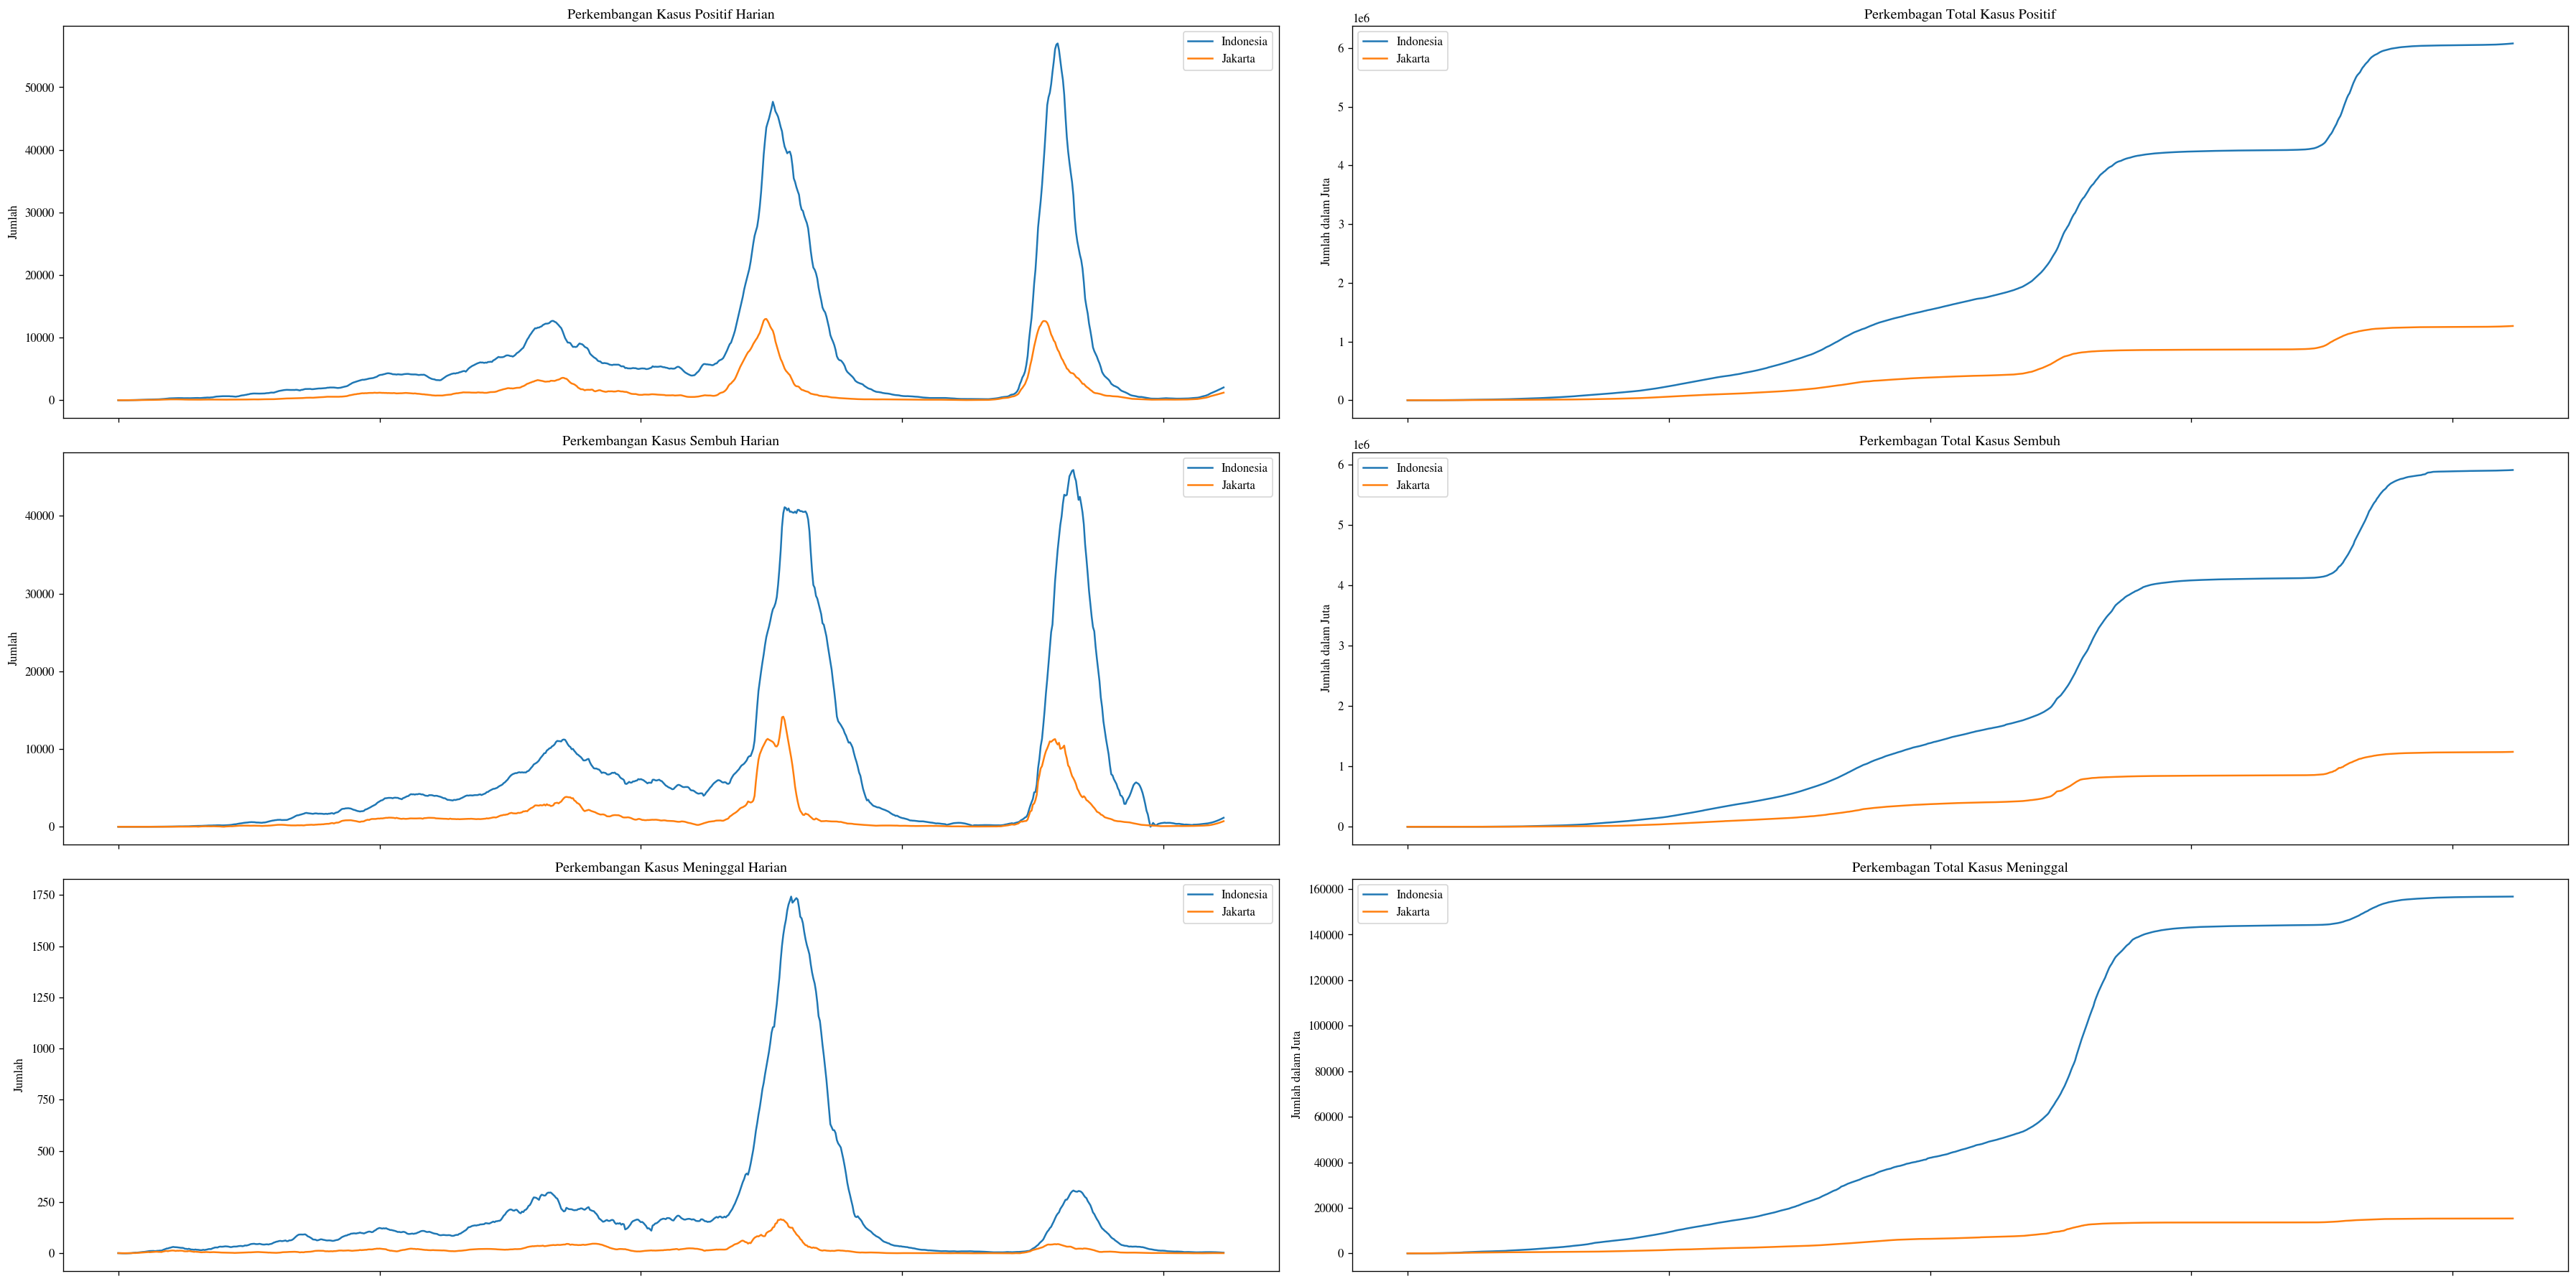

In [ ]:
# Code biar graphnya lebih compact

# inirialisasi
plt.figure(figsize = (30, 15), dpi = 120)
arr_of_axis, arr_of_y_data  = [], [[y11, y12], [y21, y22], [y31, y32], [y41, y42], [y51, y52], [y61, y62]]

# process data harian (indeks genap)
for i in range(0, len(arr_of_y_data), 2):
  arr_of_y_data[i] = smoothenGraph(arr_of_y_data[i])

# subplot config
n = len(arr_of_y_data) # many subplot
plot_each_row, colm_each_axis, row_each_axis= 2, 4, 5 # axis span config
pos = 0 # axis position
gridShape = ((n // plot_each_row) * row_each_axis, plot_each_row * colm_each_axis)

# plot config
arr_of_labels = ["Jumlah", "Jumlah dalam Juta"]
arr_of_template = ["Perkembangan Kasus {} Harian", "Perkembagan Total Kasus {}"] # title template
arr_of_kat = ["Positif", "Sembuh", "Meninggal"]

# isi array axis dengan subplot2grid
for i in range(n):
  xy_pos = (row_each_axis * (pos // gridShape[1]), pos % gridShape[1])
  ax = plt.subplot2grid(gridShape, xy_pos, colspan = colm_each_axis, rowspan = row_each_axis)
  arr_of_axis.append(ax)
  pos += colm_each_axis

# plot
k = 2 # tiap kategori punya dua data, yaitu harian sama total
for (i, (ax, (y_idn, y_jkt))) in enumerate(zip(arr_of_axis, arr_of_y_data)):
  idx_kat, idx_type = i // k, i % k # kat = kategori, type = harian/total

  # sembunyikan nilai xaxis
  plt.setp(ax.get_xticklabels(), visible=False)

  ax.plot(list_x, y_idn, label = "Indonesia")
  ax.plot(list_x, y_jkt, label = "Jakarta")

  ax.set_title(arr_of_template[idx_type].format(arr_of_kat[idx_kat]))
  ax.set_ylabel(arr_of_labels[idx_type])
  ax.legend()

plt.tight_layout()

Terlihat bahwa kasus meninggal tertinggi terjadi pada varian delta, yaitu pada puncak ke dua dan positif harian tertinggi terjadi pada varian omnikron, yaitu pada puncak ketiga. Untuk kasus omnikron, awal - awal, Jakarta mempunyai kontribusi yang besar pada positif harian Indonesia karena grafiknya berimpit dengan grafik positif harian Indonesia.

Sebelum kasus delta, positif harian selalu menaik, lalu setelah kasus delta sampai puncak, kasus positif mulai turun sampai ke level awal awal pandemi. Hal tersebut berlaku untuk kematian per hari. 

## Data Vaksin Indonesia Dan Jakarta 
(
  jakarta : df_vaksinasi_data_jkt, 
  indonesia : df_vaksinasi_data_idn
)




### General Information Dataset Vaksinasi Jakarta



In [ ]:
df_vaksinasi_data_jkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Tanggal                       847 non-null    float64
 1   Vaksinasi 1 Tenaga Kesehatan  847 non-null    float64
 2   Vaksinasi 2 Tenaga Kesehatan  847 non-null    float64
 3   Vaksinasi 1 Lansia            847 non-null    float64
 4   Vaksinasi 2 Lansia            847 non-null    float64
 5   Vaksinasi 1 Pelayan Publik    847 non-null    float64
 6   Vaksinasi 2 Pelayan Publik    847 non-null    float64
 7   Vaksinasi 1 Total             847 non-null    float64
 8   Vaksinasi 2 Total             847 non-null    float64
 9   Vaksinasi 1 Harian            847 non-null    float64
 10  Vaksinasi 2 Harian            847 non-null    float64
 11  Vaksinasi 1 18 - 59 Tahun     847 non-null    float64
 12  Vaksinasi 2 18 - 59 Tahun     847 non-null    float64
 13  Vaksi

In [ ]:
df_vaksinasi_data_jkt.describe()

,Tanggal,Vaksinasi 1 Tenaga Kesehatan,Vaksinasi 2 Tenaga Kesehatan,Vaksinasi 1 Lansia,Vaksinasi 2 Lansia,Vaksinasi 1 Pelayan Publik,Vaksinasi 2 Pelayan Publik,Vaksinasi 1 Total,Vaksinasi 2 Total,Vaksinasi 1 Harian,...,Vaksinasi 1 18 - 59 Tahun,Vaksinasi 2 18 - 59 Tahun,Vaksinasi 1 12 - 17 Tahun,Vaksinasi 2 12 - 17 Tahun,Vaksinasi 1 6 - 11 Tahun,Vaksinasi 2 6 - 11 Tahun,KTP DKI Dosis 1,% KTP DKI Dosis 1,KTP DKI Dosis 2,% KTP DKI Dosis 2
count,847.000000,847.000000,847.000000,847.000000,847.000000,8.470000e+02,8.470000e+02,8.470000e+02,8.470000e+02,847.000000,...,8.470000e+02,8.470000e+02,8.470000e+02,8.470000e+02,847.000000,847.000000,8.470000e+02,847.000000,8.470000e+02,847.000000
mean,423.000000,92731.212515,85888.894923,396072.586777,338675.288076,4.476179e+06,3.318713e+06,4.964983e+06,3.743257e+06,11419.694215,...,3.763805e+06,2.822311e+06,4.751002e+05,3.712949e+05,172859.723731,120474.059032,3.361080e+06,0.374903,2.648855e+06,0.388114
std,244.652134,83443.585813,78485.106091,363615.169746,330027.132468,4.993737e+06,4.049824e+06,5.402493e+06,4.415134e+06,32079.173763,...,4.366686e+06,3.506345e+06,6.019058e+05,4.995779e+05,328264.595125,254262.636304,3.722771e+06,0.329854,3.188116e+06,0.341658
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-43536.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,211.500000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
50%,423.000000,128009.000000,111399.000000,574631.000000,453025.000000,1.203940e+06,6.640880e+05,1.906096e+06,1.231269e+06,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.192265e+06,0.625501,7.935726e+05,0.644516
75%,634.500000,182430.000000,174236.000000,783632.500000,701213.500000,1.013125e+07,8.099284e+06,1.108705e+07,8.962566e+06,3790.500000,...,9.100040e+06,7.217754e+06,1.377790e+06,1.136853e+06,0.000000,0.000000,7.433558e+06,0.670472,6.297954e+06,0.703026
max,846.000000,184450.000000,177138.000000,829949.000000,733254.000000,1.156829e+07,9.815971e+06,1.255341e+07,1.072636e+07,381150.000000,...,9.538804e+06,8.146939e+06,1.377790e+06,1.136853e+06,836150.000000,709317.000000,8.853821e+06,0.711147,7.923443e+06,0.738689


### Visualisasi Vaksinasi Jakarta

In [ ]:
# menampilkan perkembangan vaksin dosis 1 jakarta
# To DO : Buat Graph Time Seriesnya Compact -> Bikin Fungsi Compact Plot Modular 

def show(colms):
  x = df_vaksinasi_data_jkt["Tanggal"]
  for colm in colms:
    y = df_vaksinasi_data_jkt[colm]
    plt.plot(x, y, label = colm)
  plt.legend()
  plt.tight_layout()
  plt.show()

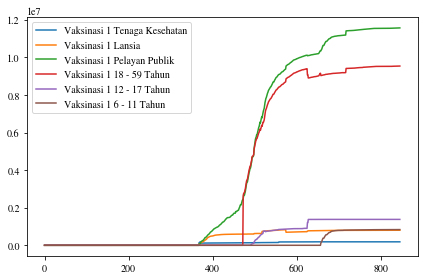

In [ ]:
colms = ['Vaksinasi 1 Tenaga Kesehatan', 'Vaksinasi 1 Lansia', 'Vaksinasi 1 Pelayan Publik', 
        'Vaksinasi 1 18 - 59 Tahun', 'Vaksinasi 1 12 - 17 Tahun', 'Vaksinasi 1 6 - 11 Tahun'
        ]
show(colms)

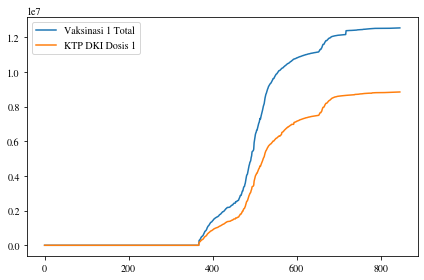

In [ ]:
colms = ['Vaksinasi 1 Total', 
          'KTP DKI Dosis 1'
        ]
show(colms)

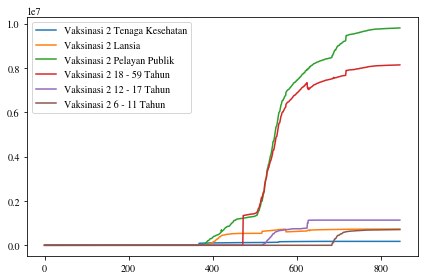

In [ ]:
# menampilkan perkembangan vaksin dosis 2 jakarta
colms = ['Vaksinasi 2 Tenaga Kesehatan', 'Vaksinasi 2 Lansia', 'Vaksinasi 2 Pelayan Publik', 
        'Vaksinasi 2 18 - 59 Tahun', 'Vaksinasi 2 12 - 17 Tahun', 'Vaksinasi 2 6 - 11 Tahun'
        ]
show(colms)

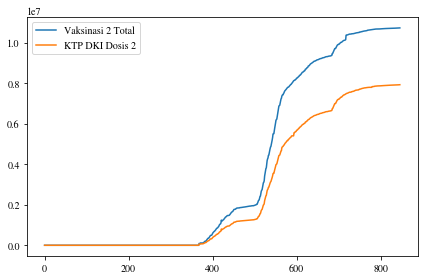

In [ ]:
colms = ['Vaksinasi 2 Total', 
          'KTP DKI Dosis 2'
        ]
show(colms)

Terlihat bahwa vaksinasi pada jakarta mulai berjalan setelah 400 hari setelah hari pertama covid terdeksi, yaitu sekitar 5 Maret 2021. Hal tersebut menjelaskan penurunan positif dan meninggal yang terjadi setelah kasus delta.  Vaksinasi didulukan untuk tenaga kesehata, lansia, dan pelayan publik

In [ ]:
# Korelasi antara vaksinasi dengan jumlah sembuh dan meninggal per hari
# ambil data vaksinasi per kategori, vaksinasi total dan vaksinasi total - dki
# sesuaikan data covid dengan data vaksinasi
colms_covid = [
         'Positif Harian (Jakarta)', 'Sembuh Harian (Jakarta)', 'Meninggal Harian (Jakarta)'
]
colms_vaksin = [
                'Vaksinasi 1 Tenaga Kesehatan', 'Vaksinasi 1 Lansia', 'Vaksinasi 1 Pelayan Publik', 
        'Vaksinasi 1 18 - 59 Tahun', 'Vaksinasi 1 12 - 17 Tahun', 'Vaksinasi 1 6 - 11 Tahun', 'Vaksinasi 1 Total', 
          'KTP DKI Dosis 1', 'Vaksinasi 2 Tenaga Kesehatan', 'Vaksinasi 2 Lansia', 'Vaksinasi 2 Pelayan Publik', 
        'Vaksinasi 2 18 - 59 Tahun', 'Vaksinasi 2 12 - 17 Tahun', 'Vaksinasi 2 6 - 11 Tahun', 'Vaksinasi 2 Total', 
          'KTP DKI Dosis 2', 
]
df_covid_data_copy = df_covid_data[:]
sembuh_meninggal = np.hstack([np.array(df_covid_data_copy[colm][368:]).reshape(-1, 1) for colm in colms_covid])
vaksin =np.hstack([np.array(df_vaksinasi_data_jkt[colm][368:]).reshape(-1, 1) for colm in colms_vaksin]) 

In [ ]:
np.shape(sembuh_meninggal)

(479, 3)

In [ ]:
vaksin_sembuh_meninggal = np.hstack([vaksin, sembuh_meninggal]) 
vaksin_sembuh_meninggal = pd.DataFrame(vaksin_sembuh_meninggal)
vaksin_sembuh_meninggal.columns = colms_vaksin + colms_covid

In [ ]:
vaksin_sembuh_meninggal

,Vaksinasi 1 Tenaga Kesehatan,Vaksinasi 1 Lansia,Vaksinasi 1 Pelayan Publik,Vaksinasi 1 18 - 59 Tahun,Vaksinasi 1 12 - 17 Tahun,Vaksinasi 1 6 - 11 Tahun,Vaksinasi 1 Total,KTP DKI Dosis 1,Vaksinasi 2 Tenaga Kesehatan,Vaksinasi 2 Lansia,Vaksinasi 2 Pelayan Publik,Vaksinasi 2 18 - 59 Tahun,Vaksinasi 2 12 - 17 Tahun,Vaksinasi 2 6 - 11 Tahun,Vaksinasi 2 Total,KTP DKI Dosis 2,Positif Harian (Jakarta),Sembuh Harian (Jakarta),Meninggal Harian (Jakarta)
0,141425.0,76451.0,64121.0,0.0,0.0,0.0,281997.0,1.763894e+05,91078.0,0.0,0.0,0.0,0.0,0.0,91078.0,5.870123e+04,1159.0,1342.0,45.0
1,144046.0,79421.0,66484.0,0.0,0.0,0.0,289951.0,1.813647e+05,91379.0,0.0,0.0,0.0,0.0,0.0,91379.0,5.889523e+04,1616.0,1517.0,46.0
2,177126.0,83628.0,73752.0,0.0,0.0,0.0,334506.0,2.092339e+05,91460.0,0.0,2514.0,0.0,0.0,0.0,93974.0,6.056775e+04,1834.0,1809.0,42.0
3,181237.0,95140.0,85333.0,0.0,0.0,0.0,361710.0,2.262500e+05,92988.0,1.0,3989.0,0.0,0.0,0.0,96978.0,6.250388e+04,1783.0,1505.0,48.0
4,113326.0,135128.0,174685.0,0.0,0.0,0.0,423139.0,2.646739e+05,89984.0,675.0,29195.0,0.0,0.0,0.0,119854.0,7.724783e+04,867.0,1656.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,184450.0,800436.0,11565146.0,9536279.0,1377790.0,835527.0,12550032.0,8.850225e+06,177138.0,732933.0,9810045.0,8142150.0,1136853.0,708180.0,10720116.0,7.917200e+06,1226.0,362.0,0.0
475,184450.0,800515.0,11565868.0,9536808.0,1377790.0,835720.0,12550833.0,8.851242e+06,177138.0,733059.0,9812263.0,8143902.0,1136853.0,708646.0,10722460.0,7.919797e+06,1054.0,605.0,0.0
476,184450.0,800570.0,11566873.0,9537627.0,1377790.0,835906.0,12551893.0,8.852315e+06,177138.0,733143.0,9813762.0,8145117.0,1136853.0,708930.0,10724043.0,7.921318e+06,1266.0,669.0,2.0
477,184450.0,800609.0,11567951.0,9538552.0,1377790.0,836059.0,12553010.0,8.853282e+06,177138.0,733172.0,9814500.0,8145716.0,1136853.0,709069.0,10724810.0,7.921771e+06,1045.0,710.0,0.0


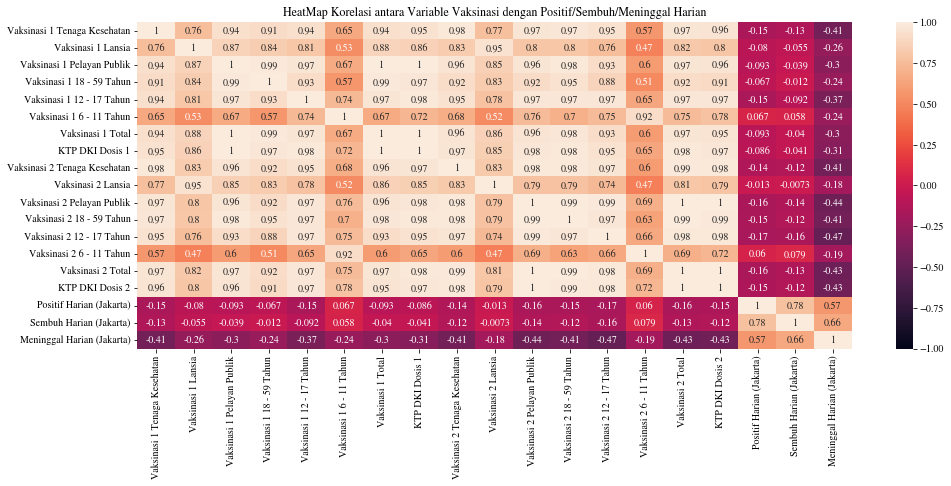

In [ ]:
# heatmap
plt.figure(figsize=(16, 6))
plt.title("HeatMap Korelasi antara Variable Vaksinasi dengan Positif/Sembuh/Meninggal Harian")
sns.heatmap(vaksin_sembuh_meninggal.corr(),vmin=-1, vmax=1, annot=True)

Dari heatmap di atas terlihat bahwa banyaknya orang yang tervaksinasi berbanding terbalik dengan kematian harian yang terjadi di Jakarta, dengan korelasi berkisar di  -0.40. Vaksinasi juga berbanding terbalik dengan positif harian secara lemah, yaitu dengan korelasi sekitar -0.1



### General Information Dataset Vaksinasi Indonesia



In [ ]:
df_vaksinasi_data_idn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Tanggal                       847 non-null    float64
 1   Vaksinasi 1 Tenaga Kesehatan  847 non-null    float64
 2   Vaksinasi 2 Tenaga Kesehatan  847 non-null    float64
 3   Vaksinasi 1 Lansia            847 non-null    float64
 4   Vaksinasi 2 Lansia            847 non-null    float64
 5   Vaksinasi 1 Pelayan Publik    847 non-null    float64
 6   Vaksinasi 2 Pelayan Publik    847 non-null    float64
 7   Vaksinasi 1 Total             847 non-null    float64
 8   Vaksinasi 2 Total             847 non-null    float64
 9   Vaksinasi 1 Harian            847 non-null    float64
 10  Vaksinasi 2 Harian            847 non-null    float64
 11  Vaksinasi 1 18 - 59 Tahun     847 non-null    float64
 12  Vaksinasi 2 18 - 59 Tahun     847 non-null    float64
 13  Vaksi

In [ ]:
df_vaksinasi_data_idn.describe()

,Tanggal,Vaksinasi 1 Tenaga Kesehatan,Vaksinasi 2 Tenaga Kesehatan,Vaksinasi 1 Lansia,Vaksinasi 2 Lansia,Vaksinasi 1 Pelayan Publik,Vaksinasi 2 Pelayan Publik,Vaksinasi 1 Total,Vaksinasi 2 Total,Vaksinasi 1 Harian,Vaksinasi 2 Harian,Vaksinasi 1 18 - 59 Tahun,Vaksinasi 2 18 - 59 Tahun,Vaksinasi 1 12 - 17 Tahun,Vaksinasi 2 12 - 17 Tahun
count,847.000000,8.470000e+02,8.470000e+02,8.470000e+02,8.470000e+02,8.470000e+02,8.470000e+02,8.470000e+02,8.470000e+02,8.470000e+02,8.470000e+02,8.470000e+02,8.470000e+02,8.470000e+02,8.470000e+02
mean,423.000000,1.040658e+06,9.729659e+05,5.502343e+06,3.877850e+06,5.549150e+07,3.986457e+07,6.203451e+07,4.471539e+07,2.121989e+05,1.852961e+05,4.817467e+07,3.454461e+07,6.958449e+06,5.478227e+06
std,244.652134,9.319633e+05,8.793130e+05,6.634644e+06,4.979412e+06,7.099828e+07,5.536854e+07,7.833825e+07,6.100325e+07,3.819422e+05,3.009738e+05,6.256036e+07,4.819508e+07,1.058172e+07,8.578362e+06
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.038830e+05,-1.107410e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,211.500000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,423.000000,1.493588e+06,1.352846e+06,2.520487e+06,1.499869e+06,8.294475e+06,4.730728e+06,1.230602e+07,7.583443e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,634.500000,2.031225e+06,1.928332e+06,1.109646e+07,7.004179e+06,1.242615e+08,8.408351e+07,1.373891e+08,9.301602e+07,2.941380e+05,2.946700e+05,1.064821e+08,7.032456e+07,2.320390e+07,1.599069e+07
max,846.000000,2.114655e+06,1.979860e+06,1.796440e+07,1.452945e+07,1.813330e+08,1.522758e+08,2.013517e+08,1.687852e+08,4.036322e+06,1.776119e+06,1.579718e+08,1.323055e+08,2.541552e+07,2.195021e+07


### Visualisasi Vaksinasi Indonesia

In [ ]:
# menampilkan perkembangan vaksin indonesia
# To DO : Buat Graph Time Seriesnya Compact -> Bikin Fungsi Compact Plot Modular 
def show(colms):
  x = df_vaksinasi_data_idn["Tanggal"]
  for colm in colms:
    y = df_vaksinasi_data_idn[colm]
    plt.plot(x, y, label = colm)
  plt.legend()
  plt.tight_layout()
  plt.show()

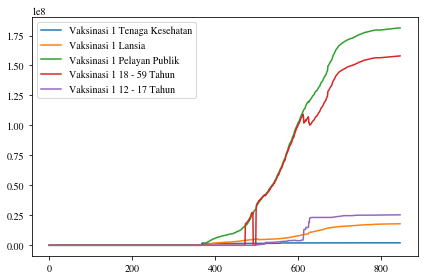

In [ ]:
colms = ['Vaksinasi 1 Tenaga Kesehatan', 'Vaksinasi 1 Lansia', 'Vaksinasi 1 Pelayan Publik', 
        'Vaksinasi 1 18 - 59 Tahun', 'Vaksinasi 1 12 - 17 Tahun'
        ]
show(colms)

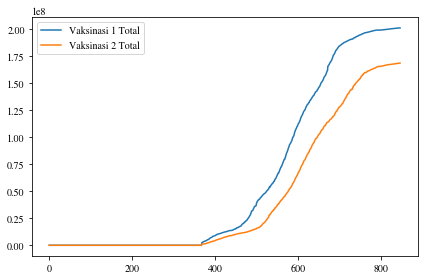

In [ ]:
colms = ['Vaksinasi 1 Total', 'Vaksinasi 2 Total'
        ]
show(colms)

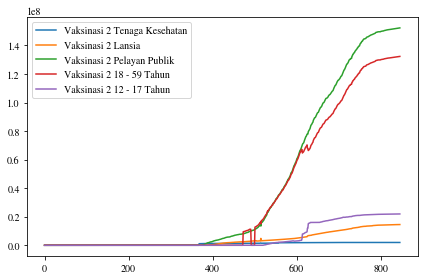

In [ ]:
# menampilkan perkembangan vaksin dosis 2 jakarta
colms = ['Vaksinasi 2 Tenaga Kesehatan', 'Vaksinasi 2 Lansia', 'Vaksinasi 2 Pelayan Publik', 
        'Vaksinasi 2 18 - 59 Tahun', 'Vaksinasi 2 12 - 17 Tahun'
        ]
show(colms)

In [ ]:
# Korelasi antara vaksinasi dengan jumlah sembuh dan meninggal per hari
# ambil data vaksinasi per kategori, vaksinasi total dan vaksinasi total - dki
# sesuaikan data covid dengan data vaksinasi
colms_covid = [
         'Positif Harian (Indonesia)', 'Sembuh Harian (Indonesia)', 'Meninggal Harian (Indonesia)'
]
colms_vaksin = [
                'Vaksinasi 1 Tenaga Kesehatan', 'Vaksinasi 1 Lansia', 'Vaksinasi 1 Pelayan Publik', 
        'Vaksinasi 1 18 - 59 Tahun', 'Vaksinasi 1 12 - 17 Tahun',  'Vaksinasi 1 Total', 
          'Vaksinasi 2 Tenaga Kesehatan', 'Vaksinasi 2 Lansia', 'Vaksinasi 2 Pelayan Publik', 
        'Vaksinasi 2 18 - 59 Tahun', 'Vaksinasi 2 12 - 17 Tahun', 'Vaksinasi 2 Total', 
]
df_covid_data_copy = df_covid_data[:]
sembuh_meninggal = np.hstack([np.array(df_covid_data_copy[colm][368:]).reshape(-1, 1) for colm in colms_covid])
vaksin =np.hstack([np.array(df_vaksinasi_data_idn[colm][368:]).reshape(-1, 1) for colm in colms_vaksin]) 

In [ ]:
vaksin_sembuh_meninggal = np.hstack([vaksin, sembuh_meninggal]) 
vaksin_sembuh_meninggal = pd.DataFrame(vaksin_sembuh_meninggal)
vaksin_sembuh_meninggal.columns = colms_vaksin + colms_covid

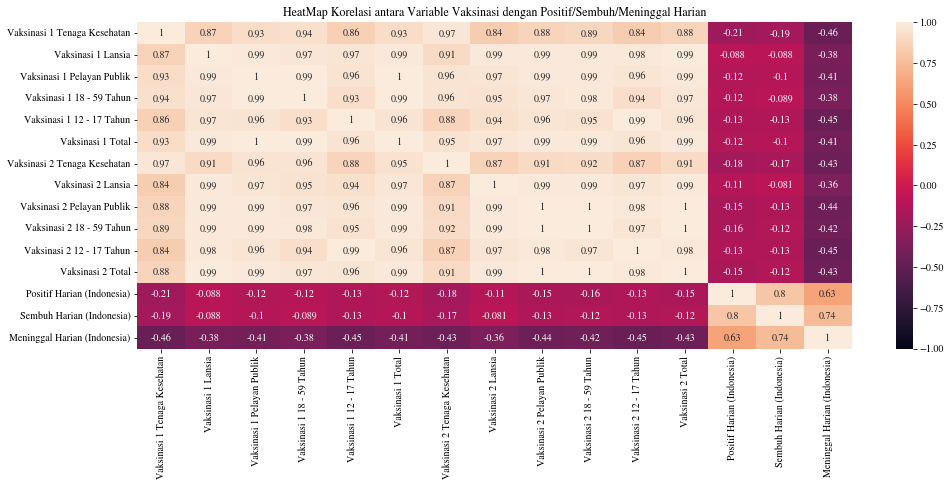

In [ ]:
# heatmap
plt.figure(figsize=(16, 6))
plt.title("HeatMap Korelasi antara Variable Vaksinasi dengan Positif/Sembuh/Meninggal Harian")
sns.heatmap(vaksin_sembuh_meninggal.corr(),vmin=-1, vmax=1, annot=True)

Dari heatmap di atas terlihat bahwa banyaknya orang yang tervaksinasi berbanding terbalik dengan kematian harian yang terjadi di Indonesia, dengan korelasi berkisar di  -0.40. Vaksinasi juga berbanding terbalik secara lemah dengan positif harian, yaitu dengan korelasi sekitar -0.1

## Data Mobilitas Indonesia dan Jakarta

### General Information

In [ ]:
indo_mobility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865 entries, 0 to 864
Data columns (total 7 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                865 non-null    int64  
 1   retail_and_recreation_percent_change_from_baseline  865 non-null    float64
 2   grocery_and_pharmacy_percent_change_from_baseline   865 non-null    float64
 3   parks_percent_change_from_baseline                  865 non-null    float64
 4   transit_stations_percent_change_from_baseline       865 non-null    float64
 5   workplaces_percent_change_from_baseline             865 non-null    float64
 6   residential_percent_change_from_baseline            865 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 47.4 KB


In [ ]:
jakarta_mobility.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 865 entries, 4173 to 26515
Data columns (total 8 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   sub_region_1                                        865 non-null    object 
 1   date                                                865 non-null    int64  
 2   retail_and_recreation_percent_change_from_baseline  865 non-null    float64
 3   grocery_and_pharmacy_percent_change_from_baseline   865 non-null    float64
 4   parks_percent_change_from_baseline                  865 non-null    float64
 5   transit_stations_percent_change_from_baseline       865 non-null    float64
 6   workplaces_percent_change_from_baseline             865 non-null    int64  
 7   residential_percent_change_from_baseline            865 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 60.8+ KB


In [ ]:
indo_mobility.describe()

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
count,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000
mean,416.000000,-5.332467,16.168499,1.881707,-21.777728,-14.546675,6.379148
std,249.848287,16.398779,21.188085,28.393114,17.692465,17.139993,5.454420
min,-16.000000,-50.085714,-32.171429,-51.914286,-67.571429,-71.628571,-2.571429
25%,200.000000,-15.600000,-0.064516,-15.085714,-33.228571,-24.457143,1.400000
50%,416.000000,-8.121212,14.742857,-4.942857,-23.571429,-17.714286,5.428571
75%,632.000000,8.828571,33.314286,7.828571,-8.742857,-4.400000,10.742857
max,848.000000,42.285714,101.857143,185.600000,36.657143,32.657143,23.771429


In [ ]:
jakarta_mobility.describe()

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
count,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000
mean,416.000000,-25.732948,-3.936416,-41.662428,-37.330636,-27.381503,11.519075
std,249.848287,14.360009,11.699235,23.765916,14.584740,15.594845,5.560893
min,-16.000000,-68.000000,-46.000000,-96.000000,-79.000000,-82.000000,-1.000000
25%,200.000000,-34.000000,-12.000000,-56.000000,-45.000000,-34.000000,8.000000
50%,416.000000,-25.000000,-4.000000,-45.000000,-38.000000,-29.000000,11.000000
75%,632.000000,-15.000000,5.000000,-23.000000,-28.000000,-16.000000,14.000000
max,848.000000,10.000000,34.000000,31.000000,9.000000,8.000000,34.000000


### Visualisasi

#### Jakarta

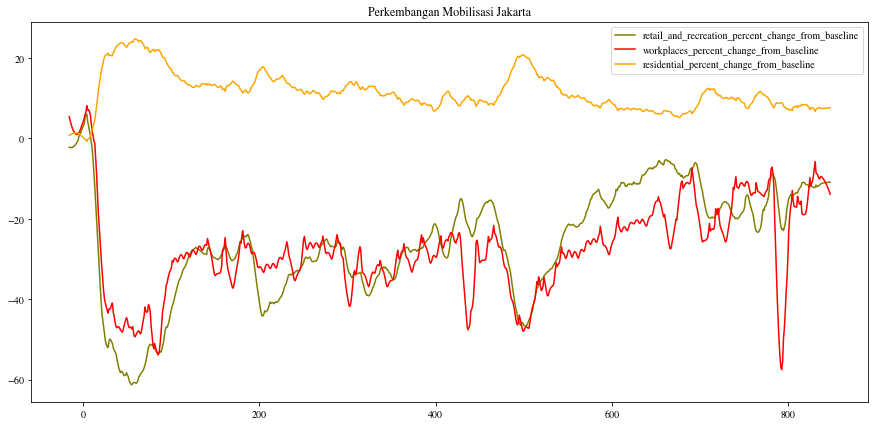

In [ ]:
plt.figure(figsize = (15, 7))
plt.plot(jakarta_mobility["date"], smoothenGraph([jakarta_mobility["retail_and_recreation_percent_change_from_baseline"]])[0], label = "retail_and_recreation_percent_change_from_baseline", color = "olive")
plt.plot(jakarta_mobility["date"], smoothenGraph([jakarta_mobility['workplaces_percent_change_from_baseline']])[0], label ='workplaces_percent_change_from_baseline', color = "red")
plt.plot(jakarta_mobility["date"], smoothenGraph([jakarta_mobility['residential_percent_change_from_baseline']])[0], label = 'residential_percent_change_from_baseline', color = "orange")
plt.title("Perkembangan Mobilisasi Jakarta")
plt.legend()

Pada masa pandemi, residential percentage selalu berada di atas 0% karena semua kegiatan dijalankan secara daring dan nilai tersebut untuk tren baru baru ini mulai turun mendekati 0%. 

Untuk retail dan recreation pada awal awal berada pada nilai minus dan tren yang didapat adalah nilai tersebut cenderung naik. Namun masih tetap dibawah baseline. 

Untuk workplace, penurunan besar kemungkinan terjadi karena hari tersebut adalah weekend, dan trennya adalah nilai tersebut kian menaik. 

In [246]:
# korelasi antara mobilisasi dengan positif harian
colms_covid = [
         'Positif Harian (Jakarta)'
]
colms_mobilisasi = [
                    'retail_and_recreation_percent_change_from_baseline',
                    'grocery_and_pharmacy_percent_change_from_baseline',
                    'parks_percent_change_from_baseline',
                    'transit_stations_percent_change_from_baseline',
                    'workplaces_percent_change_from_baseline',
                    'residential_percent_change_from_baseline'                
]

df_covid_data_copy = df_covid_data[:]
positif = np.hstack([np.array(df_covid_data_copy[colm]).reshape(-1, 1) for colm in colms_covid])
mobilisasi =np.hstack([np.array(jakarta_mobility[colm]).reshape(-1, 1) for colm in colms_mobilisasi])[:847] 

In [247]:
positif_mobilisasi = np.hstack([mobilisasi, positif]) 
positif_mobilisasi = pd.DataFrame(positif_mobilisasi)
positif_mobilisasi.columns = colms_mobilisasi + colms_covid

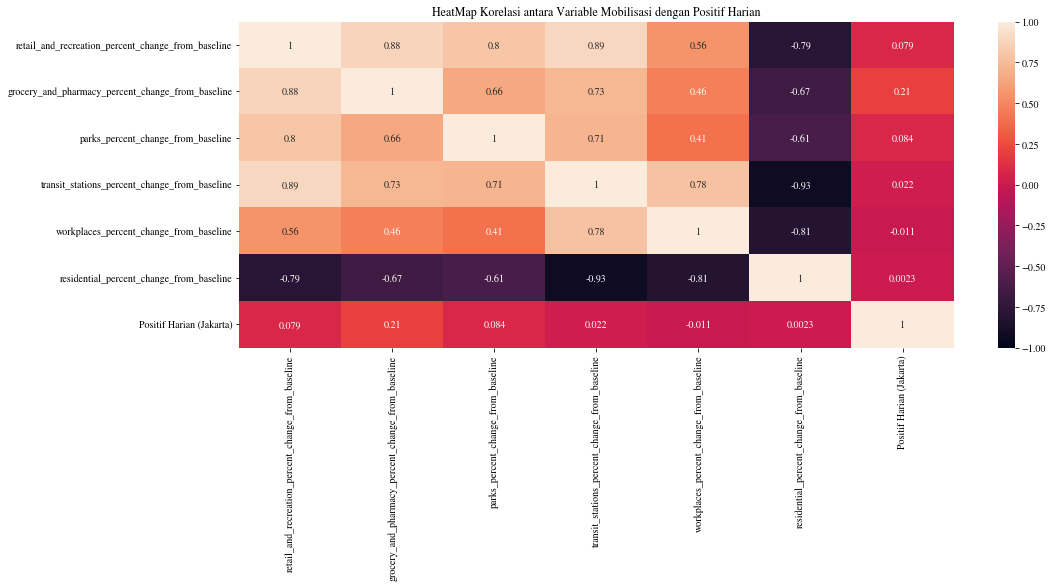

In [248]:
# heatmap
plt.figure(figsize=(16, 6))
plt.title("HeatMap Korelasi antara Variable Mobilisasi dengan Positif Harian")
sns.heatmap(positif_mobilisasi.corr(),vmin=-1, vmax=1, annot=True)

Dari heatmap di atas terlihat bahwa mobilitas tidak terlalu berpengaruh terhadap positif harian di jakarta selain grocery dan pharmacy. Grocery dan pharmacy berbanding lurus dengan positif dengan korelasi sebesar 0,25

#### Indonesia

In [ ]:
# korelasi antara mobilisasi dengan positif harian
colms_covid = [
         'Positif Harian (Indonesia)'
]
colms_mobilisasi = [
                    'retail_and_recreation_percent_change_from_baseline',
                    'grocery_and_pharmacy_percent_change_from_baseline',
                    'parks_percent_change_from_baseline',
                    'transit_stations_percent_change_from_baseline',
                    'workplaces_percent_change_from_baseline',
                    'residential_percent_change_from_baseline'                
]

df_covid_data_copy = df_covid_data[:]
positif = np.hstack([np.array(df_covid_data_copy[colm]).reshape(-1, 1) for colm in colms_covid])
mobilisasi =np.hstack([np.array(indo_mobility[colm]).reshape(-1, 1) for colm in colms_mobilisasi])[:847] 

In [ ]:
positif_mobilisasi = np.hstack([mobilisasi, positif]) 
positif_mobilisasi = pd.DataFrame(positif_mobilisasi)
positif_mobilisasi.columns = colms_mobilisasi + colms_covid

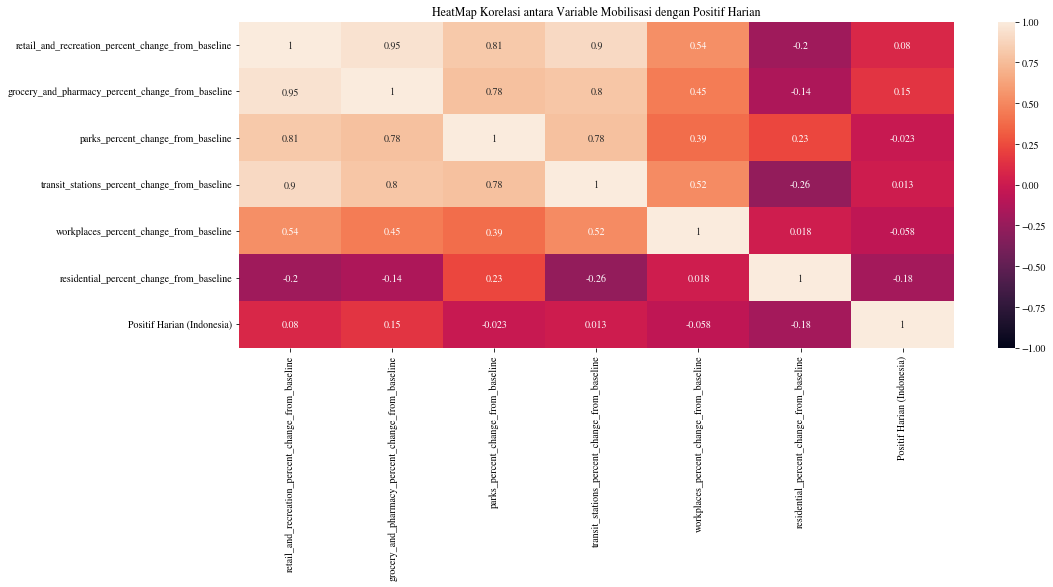

In [ ]:
# heatmap
plt.figure(figsize=(16, 6))
plt.title("HeatMap Korelasi antara Variable Mobilisasi dengan Positif Harian")
sns.heatmap(positif_mobilisasi.corr(),vmin=-1, vmax=1, annot=True)

Sama halnya dengan jakarta, untuk indonesia, kategori yang menunjukkan korelasi pada postiif harian di Indonesia adalah grocery dan pharmacy

# D. MODELLING

## 1. Prediksi Dengan Machine Learning Models

In [ ]:
# Generate Training & Validation Data
hari = np.array([i for i in range(0,y12.shape[0])])
ml_positifHarian = pd.DataFrame([hari, y12]).transpose().rename({0: 'Hari', 1: 'Positif Harian'}, axis='columns')
train_ml= ml_positifHarian.iloc[:int(y12.shape[0]*0.95)]
valid_ml= ml_positifHarian.iloc[int(y12.shape[0]*0.95):]

In [ ]:
model_scores = []

**Linear Regression**

In [ ]:
lin_reg=LinearRegression(normalize=True)

In [ ]:
lin_reg.fit(np.array(train_ml['Hari']).reshape(-1,1), np.array(train_ml['Positif Harian']).reshape(-1,1))

LinearRegression(normalize=True)

In [ ]:
prediction_valid_linreg=lin_reg.predict(np.array(valid_ml["Hari"]).reshape(-1,1))

In [ ]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Positif Harian"],prediction_valid_linreg)))
print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(valid_ml["Positif Harian"],prediction_valid_linreg)))

Root Mean Square Error for Linear Regression:  2366.499850835847


**Polynomial Regression**

In [ ]:
poly_reg =PolynomialFeatures(degree = 8) 
train_poly=poly_reg.fit_transform(np.array(train_ml["Hari"]).reshape(-1,1))
valid_poly=poly_reg.fit_transform(np.array(valid_ml["Hari"]).reshape(-1,1))
y=train_ml["Positif Harian"]

In [ ]:
linreg=LinearRegression(normalize=True)
linreg.fit(train_poly,y)

LinearRegression(normalize=True)

In [ ]:
prediction_poly=linreg.predict(valid_poly)
rmse_poly=np.sqrt(mean_squared_error(valid_ml["Positif Harian"],prediction_poly))
model_scores.append(rmse_poly)
print("Root Mean Squared Error for Polynomial Regression: ",rmse_poly)

Root Mean Squared Error for Polynomial Regression:  18961.768608867213


**Support Vector Machine**

In [ ]:
svm=SVR(C=1,degree=6,kernel='poly',epsilon=0.01)

In [ ]:
svm.fit(np.array(train_ml["Hari"]).reshape(-1,1),np.array(train_ml["Positif Harian"]).reshape(-1,1))

SVR(C=1, degree=6, epsilon=0.01, kernel='poly')

In [ ]:
prediction_valid_svm=svm.predict(np.array(valid_ml["Hari"]).reshape(-1,1))

In [ ]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Positif Harian"],prediction_valid_svm)))
print("Root Mean Square Error for Support Vector Machine: ",np.sqrt(mean_squared_error(valid_ml["Positif Harian"],prediction_valid_svm)))

Root Mean Square Error for Support Vector Machine:  524.2002776928912


**Random Forest Regression**

In [ ]:
randf = RandomForestRegressor()

In [ ]:
randf.fit(np.array(train_ml["Hari"]).reshape(-1,1),np.array(train_ml["Positif Harian"]).reshape(-1,1))

RandomForestRegressor()

In [ ]:
prediction_valid_randf=randf.predict(np.array(valid_ml["Hari"]).reshape(-1,1))

In [ ]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Positif Harian"],prediction_valid_randf)))
print("Root Mean Square Error for Random Forest Regressor: ",np.sqrt(mean_squared_error(valid_ml["Positif Harian"],prediction_valid_svm)))

Root Mean Square Error for Random Forest Regressor:  524.2002776928912


## 2. Prediksi Dengan Time Series Forecasting

**Holt's Linear Model**

In [ ]:
holt=Holt(np.asarray(train_ml["Positif Harian"])).fit(smoothing_level=0.4, smoothing_slope=0.4,optimized=False) 

In [ ]:
valid_ml["Holt"]=holt.forecast(len(valid_ml))
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Positif Harian"],valid_ml["Holt"])))
print("Root Mean Square Error Holt's Linear Model: ",np.sqrt(mean_squared_error(valid_ml["Positif Harian"],valid_ml["Holt"])))

Root Mean Square Error Holt's Linear Model:  408.8066236376181


**Holt's Winter Model**

In [ ]:
es=ExponentialSmoothing(np.asarray(train_ml['Positif Harian']),seasonal_periods=12,trend='add', seasonal='add').fit()

In [ ]:
valid_ml["Holt's Winter Model"]=es.forecast(len(valid_ml))
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Positif Harian"],valid_ml["Holt's Winter Model"])))
print("Root Mean Square Error for Holt's Winter Model: ",np.sqrt(mean_squared_error(valid_ml["Positif Harian"],valid_ml["Holt's Winter Model"])))

Root Mean Square Error for Holt's Winter Model:  424.52647282449954


**Facebook's Prophet Model**

In [ ]:
fb_positifHarian = pd.read_excel("Daily Update Data Agregat Covid-19 Jakarta.xlsx", sheet_name = "Data Indonesia dan Jakarta")

In [ ]:
fb_train = fb_positifHarian[['Tanggal', 'Positif Harian (Jakarta)']].iloc[:int(y12.shape[0]*0.95)]
fb_valid = fb_positifHarian[['Tanggal', 'Positif Harian (Jakarta)']].iloc[int(y12.shape[0]*0.95):]

In [ ]:
prophet_c=Prophet(interval_width=0.95,weekly_seasonality=True)
prophet_positif=pd.DataFrame(zip(list(fb_positifHarian['Tanggal']),list(fb_positifHarian['Positif Harian (Jakarta)'])),columns=['ds','y'])

In [ ]:
prophet_c.fit(prophet_positif)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast_c=prophet_c.make_future_dataframe(periods=17)
forecast_positif = forecast_c.copy()


In [ ]:
positif_forecast=prophet_c.predict(forecast_c)

In [ ]:
model_scores.append(np.sqrt(mean_squared_error(fb_train["Positif Harian (Jakarta)"],positif_forecast['yhat'].head(fb_train.shape[0]))))
print("Root Mean Squared Error for Prophet Model: ",np.sqrt(mean_squared_error(fb_train["Positif Harian (Jakarta)"],positif_forecast['yhat'].head(fb_train.shape[0]))))

Root Mean Squared Error for Prophet Model:  1722.6084733269295


## 3. Hasil Ringkasan Prediksi Dengan Berbagai Model

In [ ]:
 model_names=["Linear Regression","Polynomial Regression","Support Vector Machine Regressor","Random Forest Regressor",
             "Holt's Linear", "Holt's Winter Model", "Facebook's Prophet"]
model_summary=pd.DataFrame(zip(model_names,model_scores),columns=["Model Name","Root Mean Squared Error"]).sort_values(["Root Mean Squared Error"])
model_summary

,Model Name,Root Mean Squared Error
4,Holt's Linear,408.806624
5,Holt's Winter Model,424.526473
3,Random Forest Regressor,446.290418
2,Support Vector Machine Regressor,524.200278
6,Facebook's Prophet,1722.608473
0,Linear Regression,2366.499851
1,Polynomial Regression,18961.768609


In [ ]:
model_summary['RMSE per Mean'] = model_summary['Root Mean Squared Error']/valid_ml['Positif Harian'].mean()

In [ ]:
model_summary

,Model Name,Root Mean Squared Error,RMSE per Mean
4,Holt's Linear,408.806624,1.081898
5,Holt's Winter Model,424.526473,1.123501
3,Random Forest Regressor,446.290418,1.181098
2,Support Vector Machine Regressor,524.200278,1.387285
6,Facebook's Prophet,1722.608473,4.558848
0,Linear Regression,2366.499851,6.262893
1,Polynomial Regression,18961.768609,50.181933


Berdasarkan perbandingan, model Holt's Linear adalah model yang memberikan RMSE terkecil.

In [ ]:
prediksi["Prediksi Positif Harian"] = es.forecast(30)

NameError: ignored

## Metode Menggunakan Growth (Peningkatan Nilai Positif Harian)

### Data Yang Akan Digunakan untuk model

In [ ]:
tanggal = np.array(df_covid_data["Tanggal"]) # untuk nanti plot akhir, gk dipake di model
y_covid_data = np.array(arr_of_y_data[0][1]) # ini data covid yang masih raw, blm di smoothen, untuk smoothen pilih dari arr_of_y_data, y12 smoothen = arr_y_data[0][1]

### Process Data

In [ ]:
def calculateNdaysBefore(n, y):
  len_data = np.shape(y)[0]
  weight = np.array([1 / (i**2) for i in range(n, 0, -1)])
  normalisation = 1 / weight.sum()
  weight = normalisation * weight
  y_new = [(weight * y[i - n : i]).sum() for i in range(n, len_data)]
  return np.array(y_new)


def averageAcceleration(n, y):
  # from growth find accel
  def calculateAccelAvg(i):
    avg = []
    for j in range(i, i + n - 1):
      avg.append(y[j + 1] - y[j])

    avg = (np.array(avg) * weight).sum()
    return avg

  len_data = np.shape(y)[0]
  weight = np.array([1 / (i**2) for i in range(n - 1, 0, -1)])
  normalisation = 1 / weight.sum()
  weight = normalisation * weight
  y_new = [calculateAccelAvg(i - n) for i in range(n, len_data)]
  return np.array(y_new)

In [ ]:
# get positife growth
len_data = np.shape(tanggal)[0]
growth = np.array([0] + [y_covid_data[i] - y_covid_data[i - 1] for i in range(1, len_data)])


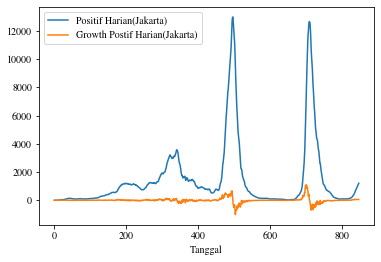

In [250]:
plt.plot(tanggal, y_covid_data, label = "Positif Harian(Jakarta)")
plt.plot(tanggal, growth, label = "Growth Postif Harian(Jakarta)")
plt.xlabel("Tanggal")
plt.legend()


Plot dari growth terlihat seperti seismograf yang menandakan terjadinya suatu usikkan seperti timbul varian baru. Tren naik turunnya terlihat, setelah varian baru datang, growth akan bernilai + sampai puncak, lalu turun ke nilai -. Sehingga growth merupakan metrik yang bagus untuk memprediksi positif 

In [ ]:
n = 7 # metrik buat sesuain mau ngambil berapa hari kebelakang untuk di rata ratain
growth_days_avg = calculateNdaysBefore(n, growth)

In [ ]:
accel = averageAcceleration(n, growth)

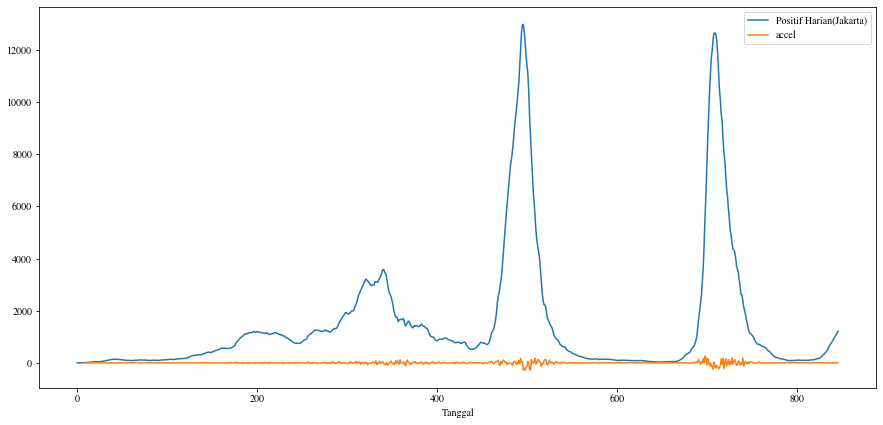

In [254]:
plt.figure(figsize=(15, 7))
plt.plot(tanggal, y_covid_data, label = "Positif Harian(Jakarta)")
plt.plot(tanggal[n:], accel, label = "accel")
plt.xlabel("Tanggal")
plt.legend()

Sama halnya dengan growth, accel juga terlihat seperti seismograf, namun nilainya terlihat random, tren naik dan turunnya tidak teratur

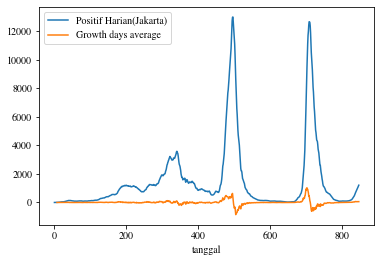

In [253]:
plt.plot(tanggal, y_covid_data, label = "Positif Harian(Jakarta)")
plt.plot(tanggal[n:], growth_days_avg, label = "Growth days average")
plt.xlabel("tanggal")
plt.legend()

Growth days average memiliki pola yang sama seperti growth

Text(0.5, 0, 'growth_days_average')

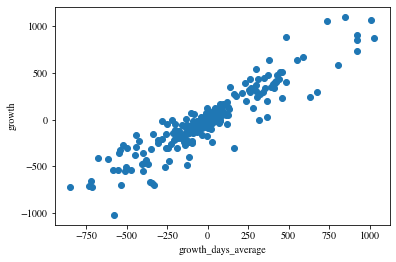

In [ ]:
plt.scatter(growth_days_avg, growth[n:])
plt.ylabel("growth")
plt.xlabel("growth_days_average")

Terlihat bahwa growth days average berbanding lurus dengan growth

Text(0.5, 0, 'accel')

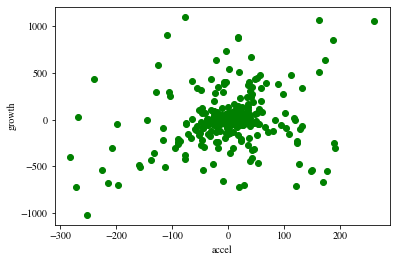

In [ ]:
plt.scatter(accel, growth[n:], color = "green")
plt.ylabel("growth")
plt.xlabel("accel")

Accel tidak memiliki korelasi yang kuat dengan growth 

In [ ]:
df = pd.DataFrame(np.hstack(
    [growth_days_avg.reshape(-1, 1), accel.reshape(-1, 1), growth[n:].reshape(-1, 1)]
))

In [ ]:
df.columns = ["Growth_Days_Average", "Acceleration Average", "Growth"]

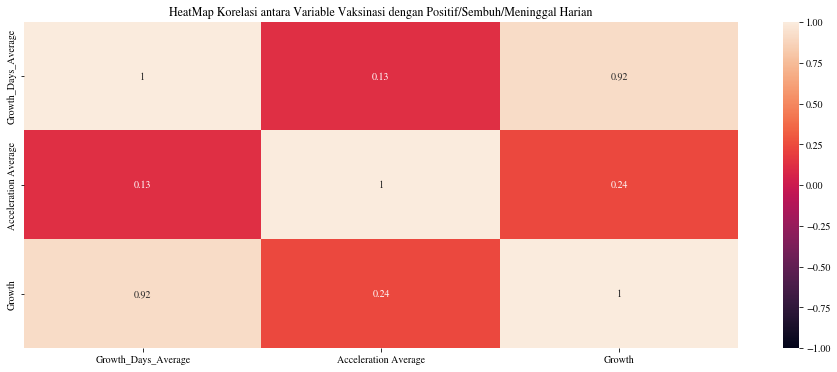

In [ ]:
plt.figure(figsize=(16, 6))
plt.title("HeatMap Korelasi antara Variable Vaksinasi dengan Positif/Sembuh/Meninggal Harian")
sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True)

dari heatmap, growth memiliki korelasi kuat dengan growth_days_average, dan memiliki korelasi lemah dengan acceleration. Oleh karena itu, untuk memprediksi growth akan digunakan growth_days_average dan acceleration average

### Prediction


In [ ]:
def reshape(x, y = np.array([])):
  x = np.array(x)
  y = np.array(y)

  if len(np.shape(x)) == 1:
    x = x.reshape(-1, 1)

  if np.shape(y)[0] > 0:
    if len(np.shape(y)) == 1:
      y = y.reshape(-1, 1)

    return x, y

  return x

def train_model(model, x_train, y_train):
  x_train, y_train = reshape(x_train, y_train)
  model.fit(x_train, y_train)

def do_cv(model, x_train, y_train):
  # ini rmse nya ngaco dah 
  x_train, y_train = reshape(x_train, y_train)
  scores = cross_val_score(model, x_train, y_train, scoring = 'neg_mean_absolute_error', cv = 2)
  rmse = np.sqrt(-scores)
  return rmse.mean()

def do_grid_search(params, model, x_train, y_train):
  x_train, y_train = reshape(x_train, y_train)
  grid_search = gscv(model, params, cv = 2, scoring = 'neg_mean_squared_error', return_train_score = True)
  grid_search.fit(x_train, y_train)
  return grid_search

def show_grid_search_scores(grid_search):
  cvres = grid_search.cv_results_
  for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

def show_pred_plot(model, x_pred, y_pred):
  x_pred, y_pred = reshape(x_pred, y_pred)
  pred = model.predict(x_pred)

  if len(np.shape(x_pred)) > 1:
    df = pd.DataFrame(
        np.hstack([pred.reshape(-1, 1), y_pred])
    )
    df.columns = ["Prediksi", "Data Asli"]
    df.plot(cmap = plt.cm.Spectral, figsize=(15, 7))

  else:
    plt.scatter(x_pred, y_pred, color = 'red', label = "Data")
    plt.scatter(x_pred, pred, color = 'green', label = "Prediction")
    plt.legend()

def test_scores(model, x_test, y_test):
  x_test, y_test = reshape(x_test, y_test)
  pred = model.predict(x_test)
  print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, pred))
  print('Mean squared Error (MSE):', metrics.mean_squared_error(y_test, pred))
  print('Root Mean squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test,pred)))

def from_growth_create_covid_data(model, y_covid_real, growth_avg, n, isForecast = False, n_forecast = 30, growth = None):
  len_data = np.shape(y_covid_real)[0] if not isForecast else n_forecast
  growth_avg = reshape(growth_avg)

  if not isForecast:
    growth_pred = model.predict(growth_avg)

  else:
    growth_pred = growth 

  pred = np.array([y_covid_real[i] for i in range(n)]) if not isForecast else y_covid_real
  for i in range(n, len_data):
    pred = np.append(pred, pred[i - 1] + growth_pred[i - n])
  return pred

def compare_covid_plot(x, y_real, y_pred, title):
  plt.plot(x, y_real, label = "Data Asli", color = "red")
  plt.plot(x, y_pred, label = "Prediksi", color = "green")
  plt.title(title)
  plt.legend()
  plt.tight_layout()
  plt.show()

In [ ]:
x = np.hstack(
    [growth_days_avg.reshape(-1, 1), accel.reshape(-1, 1)]
    )
y = np.array(growth)[n:]

In [ ]:
not np.shape(y[1])

True

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x ,y,test_size=0.2, random_state=0)

#### Elastic Net

In [ ]:
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
enet.fit(x_train, y_train.reshape(-1, 1))

ElasticNet(alpha=0.1)

In [ ]:
do_cv(enet, x_train, y_train)

5.546383792760935

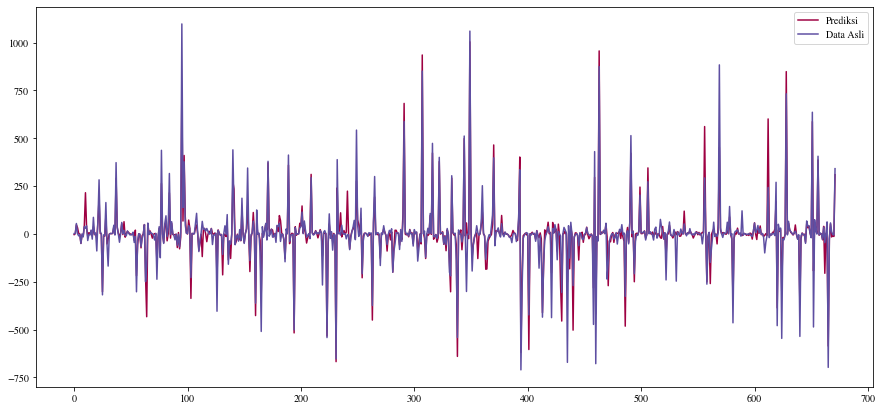

In [ ]:
show_pred_plot(enet, x_train, y_train)

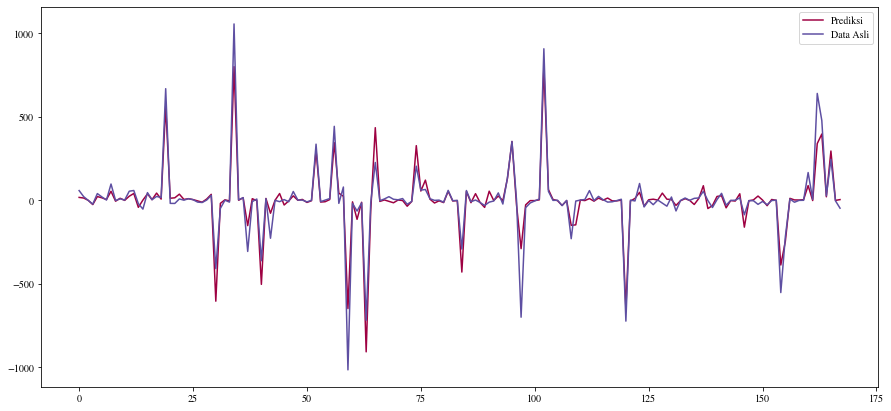

In [ ]:
show_pred_plot(enet, x_test, y_test)

In [ ]:
test_scores(enet, x_test, y_test)

Mean Absolute Error (MAE): 34.57981114072454
Mean squared Error (MSE): 5125.175587867672
Root Mean squared Error (RMSE): 71.59033166474138


In [ ]:
covid_pred = from_growth_create_covid_data(enet, y_covid_data, x, n)

In [ ]:
np.shape(covid_pred)

(847,)

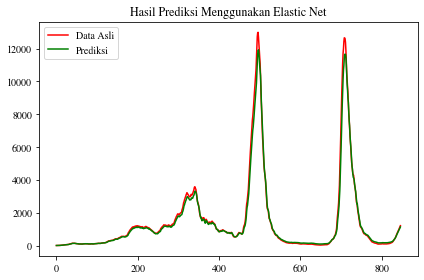

In [ ]:
compare_covid_plot(tanggal, y_covid_data, covid_pred, title = "Hasil Prediksi Menggunakan Elastic Net")

#### Random Forest Regressor

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
do_cv(rf, x_train, y_train)

5.850441699213606

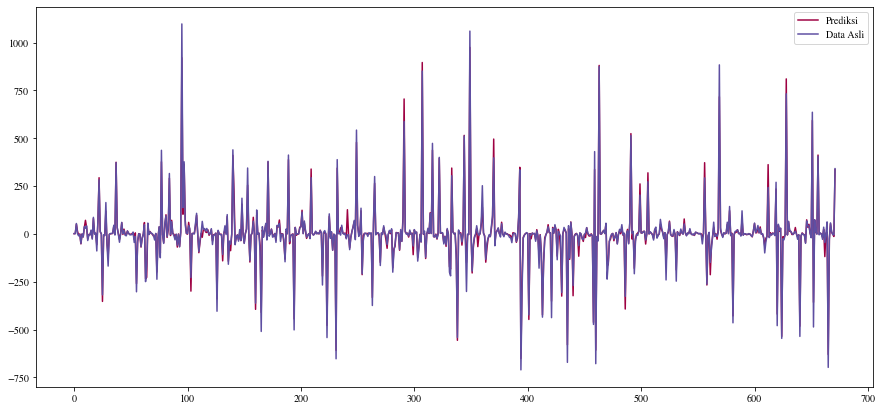

In [ ]:
show_pred_plot(rf, x_train, y_train)

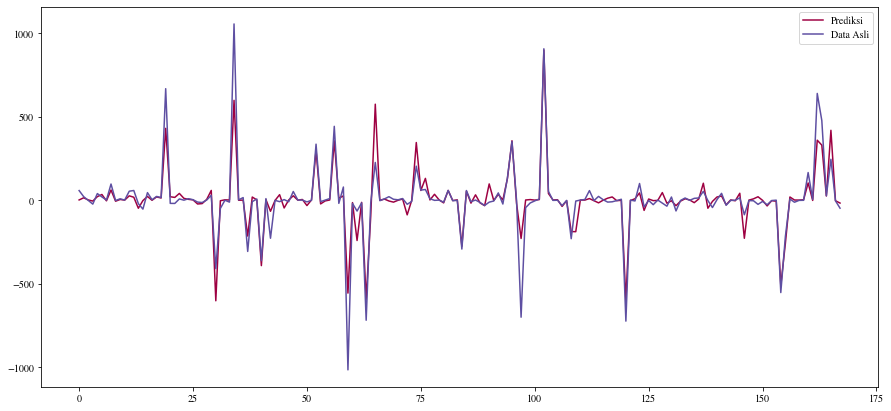

In [ ]:
show_pred_plot(rf, x_test, y_test)

In [ ]:
test_scores(rf, x_test, y_test)

Mean Absolute Error (MAE): 39.55752468056029
Mean squared Error (MSE): 7559.395566108402
Root Mean squared Error (RMSE): 86.94478458256367


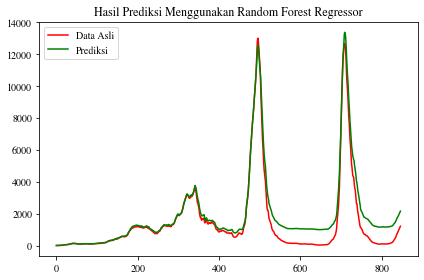

In [ ]:
covid_pred = from_growth_create_covid_data(rf, y_covid_data, x, n)
compare_covid_plot(tanggal, y_covid_data, covid_pred, title = "Hasil Prediksi Menggunakan Random Forest Regressor")

#### SVM

In [ ]:
svm=SVR(C=1,kernel='rbf',epsilon=0.01)

In [ ]:
train_model(svm, x_train, y_train)

In [ ]:
do_cv(svm, x_train, y_train)

8.236506222422733

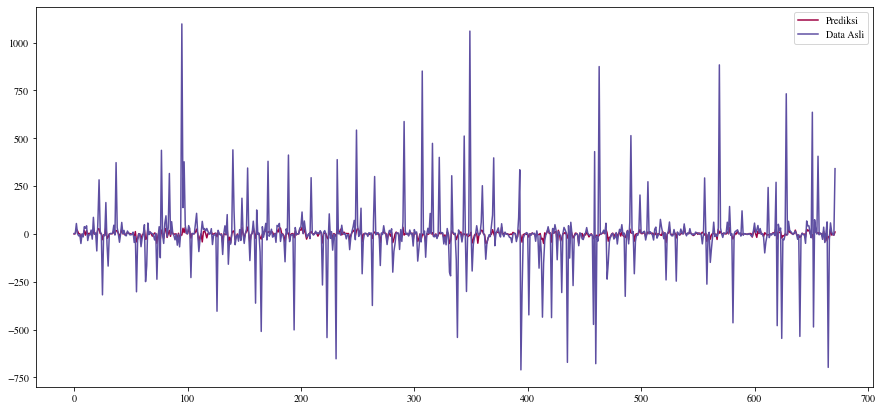

In [ ]:
show_pred_plot(svm, x_train, y_train)

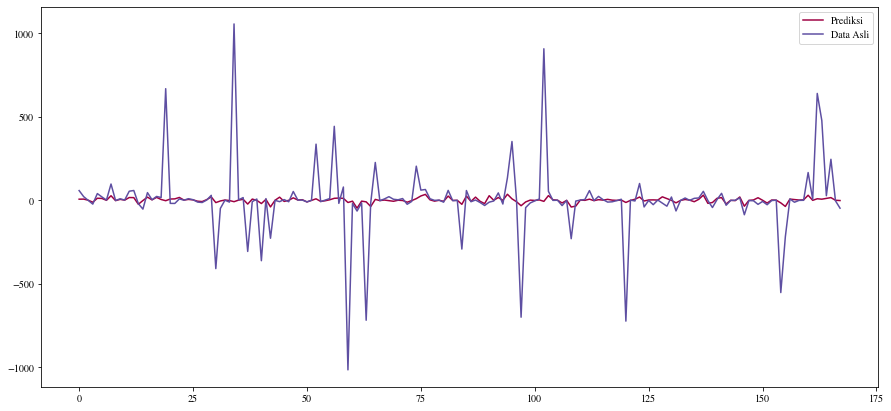

In [ ]:
show_pred_plot(svm, x_test, y_test)

In [ ]:
test_scores(svm, x_test, y_test)

Mean Absolute Error (MAE): 79.32871207457185
Mean squared Error (MSE): 41480.141907862126
Root Mean squared Error (RMSE): 203.66674227242436


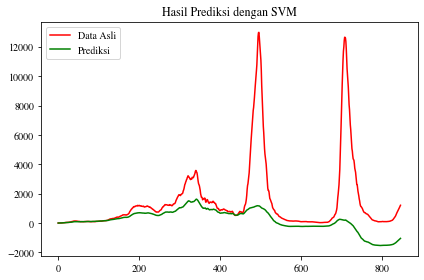

In [ ]:
covid_pred = from_growth_create_covid_data(svm, y_covid_data, x, n)
compare_covid_plot(tanggal, y_covid_data, covid_pred, title = "Hasil Prediksi dengan SVM")

#### Polynomial

In [ ]:
ply = PolynomialFeatures(degree = 3)

In [ ]:
poly_train = ply.fit_transform(x_train)
poly_valid = ply.fit_transform(x_test)

In [ ]:
linreg=LinearRegression(normalize=True)
linreg.fit(poly_train,y_train)

LinearRegression(normalize=True)

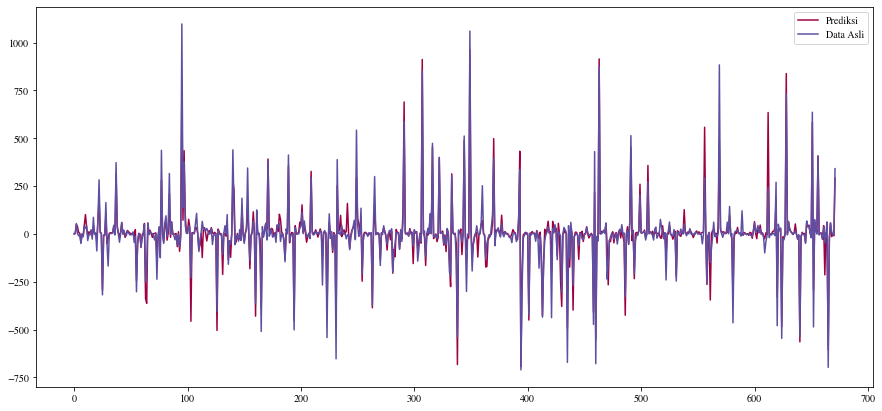

In [ ]:
show_pred_plot(linreg, poly_train, y_train)

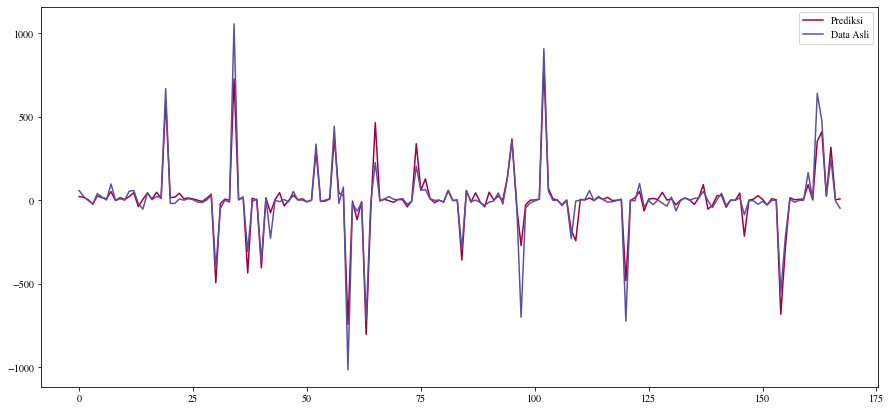

In [ ]:
show_pred_plot(linreg, poly_valid, y_test)

In [ ]:
test_scores(linreg, poly_valid, y_test)

Mean Absolute Error (MAE): 34.476757790839144
Mean squared Error (MSE): 5082.437623042739
Root Mean squared Error (RMSE): 71.29121701193449


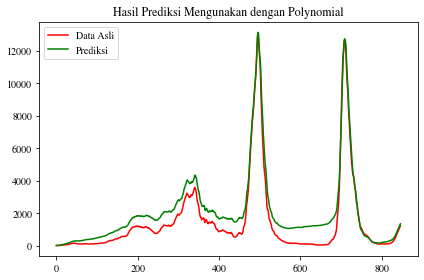

In [ ]:
x_pred = ply.fit_transform(x)
covid_pred = from_growth_create_covid_data(linreg, y_covid_data,x_pred, n)
compare_covid_plot(tanggal, y_covid_data, covid_pred, title = "Hasil Prediksi Mengunakan dengan Polynomial")

#### KNN

In [ ]:
knn = KNeighborsRegressor()

In [ ]:
do_cv(knn, x_train, y_train)

5.867973864987771

In [ ]:
train_model(knn, x_train, y_train)

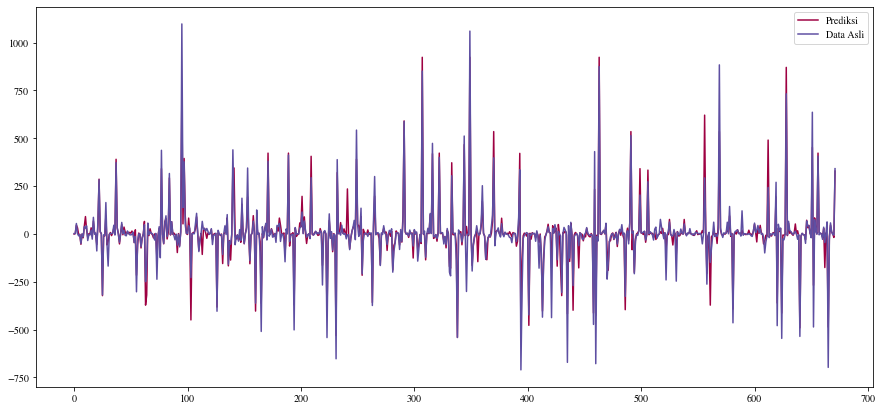

In [ ]:
show_pred_plot(knn, x_train, y_train)

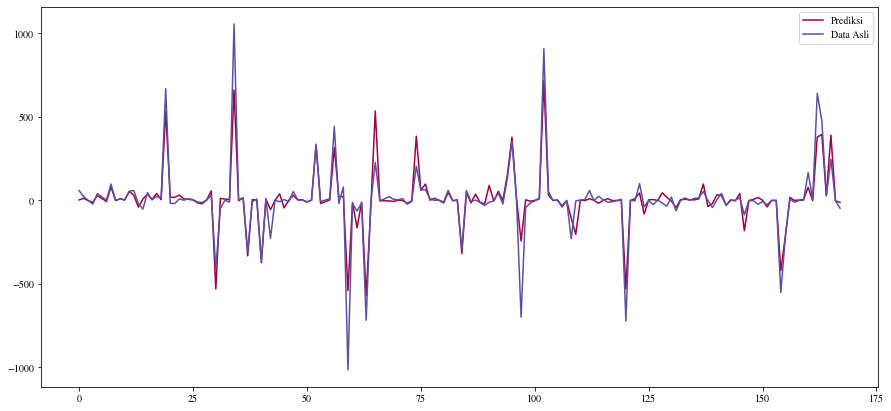

In [ ]:
show_pred_plot(knn, x_test, y_test)

In [ ]:
test_scores(knn, x_test, y_test)

Mean Absolute Error (MAE): 37.832263097041945
Mean squared Error (MSE): 6934.166861767326
Root Mean squared Error (RMSE): 83.27164500457118


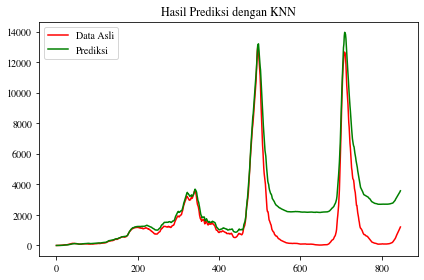

In [ ]:
covid_pred = from_growth_create_covid_data(knn, y_covid_data, x, n)
compare_covid_plot(tanggal, y_covid_data, covid_pred, title = "Hasil Prediksi dengan KNN")

### Fine Tune Model -> Model yang terbaik adalah ElasticNet, RF, dan Polynomial

#### Elastic Net

In [ ]:
params = [{
          "alpha" : [1], "l1_ratio" : [0.001, 0.0001, 0.000001]
}
]

In [ ]:
gs = do_grid_search(params, enet, x_train, y_train)

In [ ]:
show_grid_search_scores(gs)

64.68415480724491 {'alpha': 1, 'l1_ratio': 0.001}
64.68415514174332 {'alpha': 1, 'l1_ratio': 0.0001}
64.68415516015753 {'alpha': 1, 'l1_ratio': 1e-06}


In [ ]:
gs.best_params_

{'alpha': 1, 'l1_ratio': 0.001}

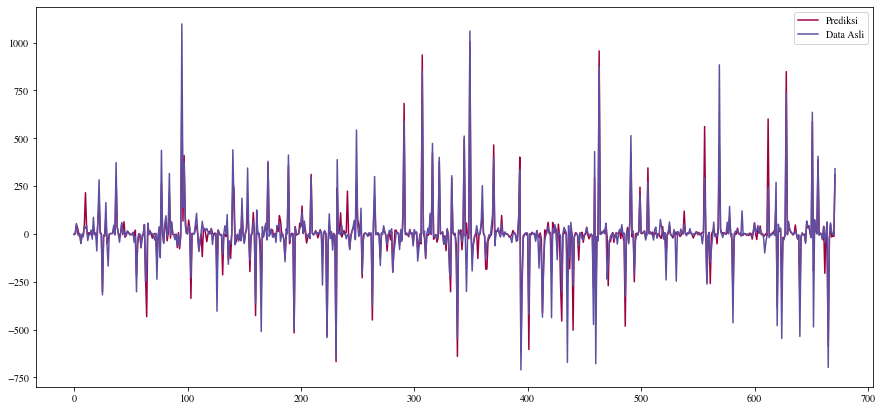

In [ ]:
show_pred_plot(gs, x_train, y_train)

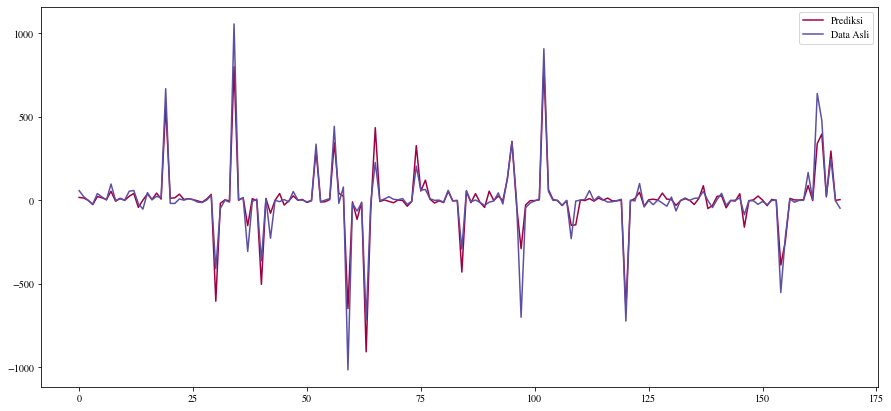

In [ ]:
show_pred_plot(gs, x_test, y_test)

In [ ]:
test_scores(enet, x_test, y_test)

Mean Absolute Error (MAE): 34.57981114072454
Mean squared Error (MSE): 5125.175587867672
Root Mean squared Error (RMSE): 71.59033166474138


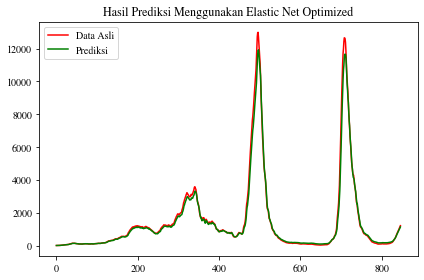

In [ ]:
covid_pred = from_growth_create_covid_data(gs, y_covid_data, x, n)
compare_covid_plot(tanggal, y_covid_data, covid_pred, title = "Hasil Prediksi Menggunakan Elastic Net Optimized")

In [ ]:
enet_best = ElasticNet(alpha = 1, l1_ratio = 0.000001)

#### Random Forest Regressor

In [ ]:
params = [{
          "n_estimators" : [30, 40], "max_depth" : [5]
}
]

In [ ]:
gs = do_grid_search(params, rf, x_train, y_train)

In [ ]:
show_grid_search_scores(gs)

72.94478908019589 {'max_depth': 5, 'n_estimators': 30}
71.7110824155871 {'max_depth': 5, 'n_estimators': 40}


In [ ]:
gs.best_params_

{'max_depth': 5, 'n_estimators': 40}

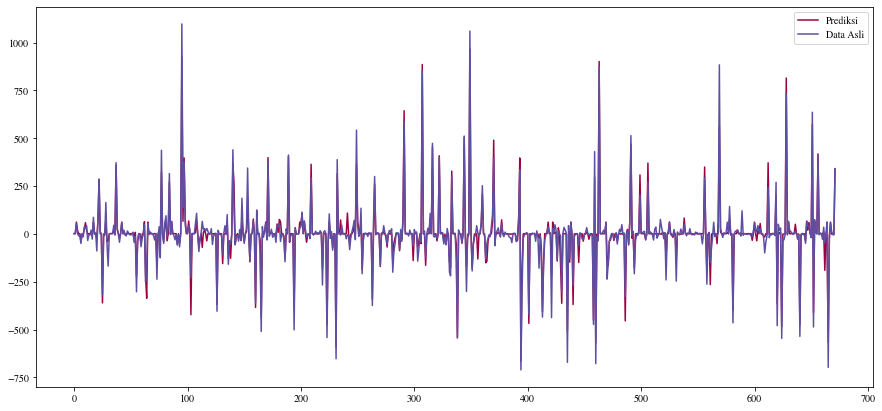

In [ ]:
show_pred_plot(gs, x_train, y_train)

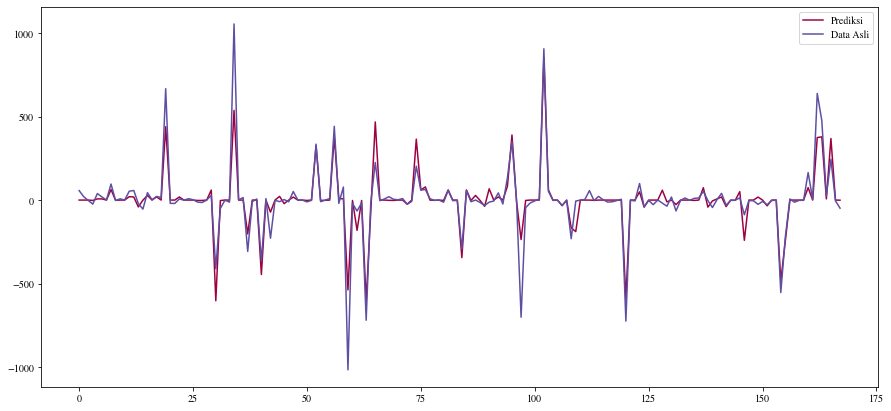

In [ ]:
show_pred_plot(gs, x_test, y_test)

In [ ]:
test_scores(gs, x_test, y_test)

Mean Absolute Error (MAE): 37.89581762025288
Mean squared Error (MSE): 7306.262845985245
Root Mean squared Error (RMSE): 85.47668012964265


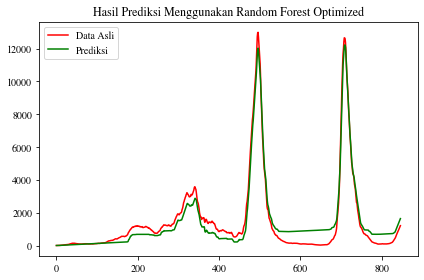

In [ ]:
covid_pred = from_growth_create_covid_data(gs, y_covid_data, x, n)
compare_covid_plot(tanggal, y_covid_data, covid_pred, title = "Hasil Prediksi Menggunakan Random Forest Optimized")

In [ ]:
rf_best = RandomForestRegressor(n_estimators = 30, max_depth = 5)

#### Polynomial

In [ ]:
ply_best = linreg

#### KNN

In [ ]:
params = [
          {
             "n_neighbors" : [20, 40, 60],  "weights" : ["uniform"]
          }
]

In [ ]:
gs = do_grid_search(params, knn, x_train, y_train)

In [ ]:
gs.best_params_

{'n_neighbors': 20, 'weights': 'uniform'}

In [ ]:
show_grid_search_scores(gs)

86.5627132016242 {'n_neighbors': 20, 'weights': 'uniform'}
109.69376234624565 {'n_neighbors': 40, 'weights': 'uniform'}
122.94918638907443 {'n_neighbors': 60, 'weights': 'uniform'}


In [ ]:
knn_best = KNeighborsRegressor(n_neighbors = 20, weights = 'uniform')

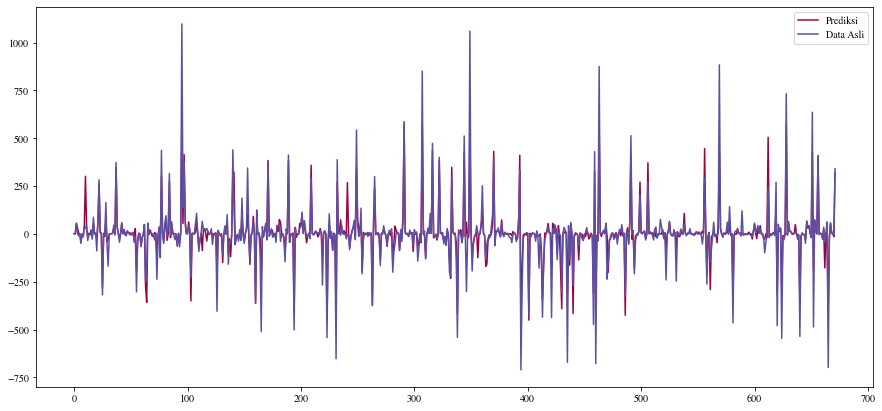

In [ ]:
show_pred_plot(gs, x_train, y_train)

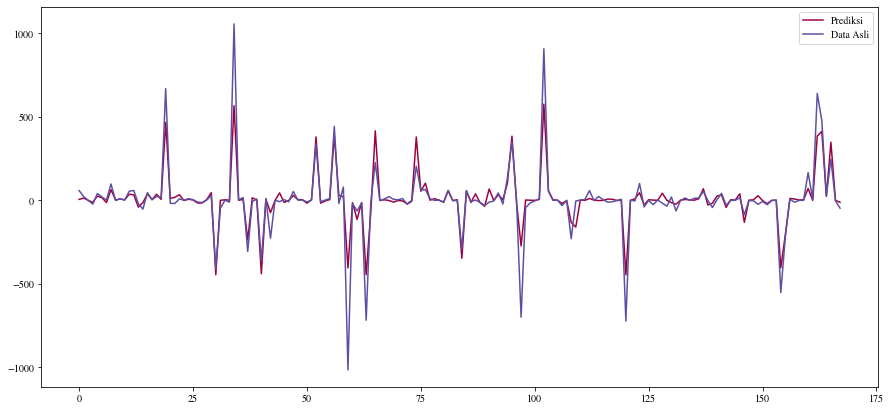

In [ ]:
show_pred_plot(gs, x_test, y_test)

In [ ]:
test_scores(knn, x_test, y_test)

Mean Absolute Error (MAE): 37.832263097041945
Mean squared Error (MSE): 6934.166861767326
Root Mean squared Error (RMSE): 83.27164500457118


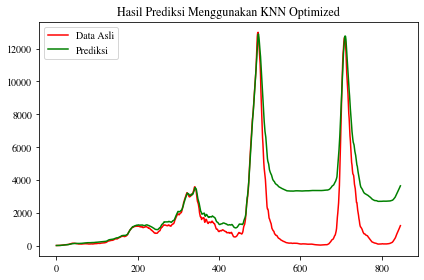

In [ ]:
covid_pred = from_growth_create_covid_data(gs, y_covid_data, x, n)
compare_covid_plot(tanggal, y_covid_data, covid_pred, title = "Hasil Prediksi Menggunakan KNN Optimized")

### Ensemble Best Predictor

In [ ]:
base_models = [("rf", rf_best), ("ply", ply_best), ("enet", enet_best)]

In [ ]:
# https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/
def get_stacking(base_models):
  # define the base models
	level0 = base_models
	# define meta learner model
	level1 = LinearRegression()
	# define the stacking ensemble
	model = StackingRegressor(estimators=level0, final_estimator=level1, cv=2)
	return model


In [ ]:
a = np.array([[0, 1, 2], [2, 3, 1]])
b = np.array([1, 2, 3])
a[0][2]

2

In [ ]:
class ensembleRegressor():
  def __init__(self, base_models):
    self.predictors = base_models
    self.weights = np.array([0.0 for i in range(len(base_models))])
    print(self.predictors)

  def fit(self, x, y):
    x, y = reshape(x, y)

    for predictor in self.predictors:
      predictor.fit(x, y)
    
    # evaluate each regressor performance
    each_prediction = np.hstack([predictor.predict(x).reshape(-1, 1) for predictor in self.predictors])
    print(np.shape(each_prediction))
    for i in range(np.shape(y)[0]):
      for j in range(len(self.predictors)):
        err = np.abs(y[i] - each_prediction[i][j])
        self.weights[j] += 1 / err ** 2

    # average the error
    normalization = 0
    for i in range(len(self.predictors)):
      self.weights[i] /= np.shape(y)[0]
      normalization += self.weights[i]

    self.weights = self.weights / normalization   

  def __weightedAverage(self, predictions):
    return (self.weights * predictions).sum(axis = 1)

  def predict(self, x):
    # get each prediction from base estimator
    x = reshape(x)
    predictions = np.hstack([predictor.predict(x).reshape(-1, 1) for predictor in self.predictors])
    return self.__weightedAverage(predictions)




In [ ]:
ensemble_models = ensembleRegressor([enet_best, knn_best, rf_best, ply_best])

[ElasticNet(alpha=1, l1_ratio=1e-06), KNeighborsRegressor(n_neighbors=20), RandomForestRegressor(max_depth=5, n_estimators=30), LinearRegression(normalize=True)]


In [ ]:
np.shape(x_train)

(672, 2)

In [ ]:
ensemble_models.fit(x_train, y_train)

(672, 4)


In [ ]:
ensemble_models.weights

array([0.02716175, 0.85014499, 0.10357129, 0.01912197])

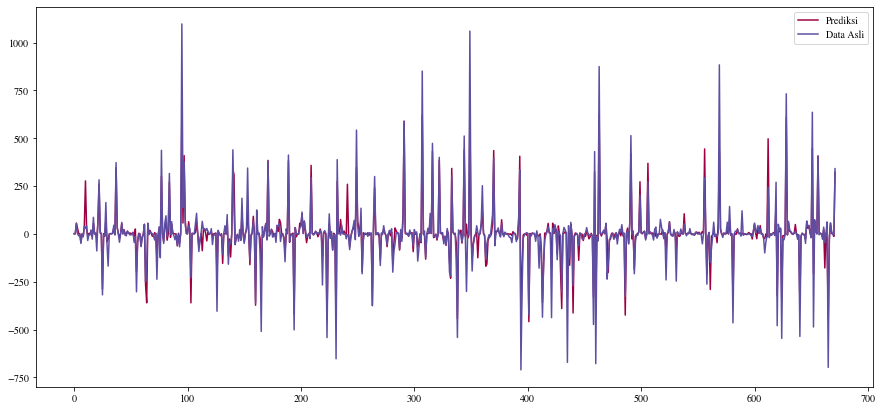

In [ ]:
show_pred_plot(ensemble_models, x_train, y_train)

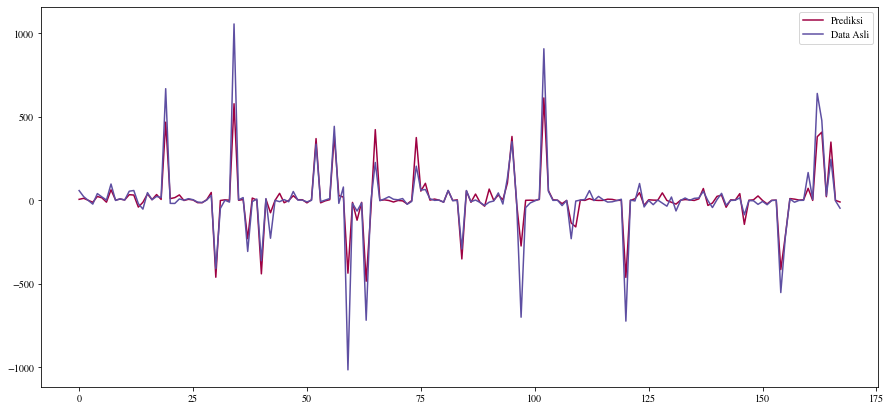

In [ ]:
show_pred_plot(ensemble_models, x_test, y_test)

In [ ]:
test_scores(ensemble_models, x_test, y_test)

Mean Absolute Error (MAE): 38.09671317579019
Mean squared Error (MSE): 7893.217880949156
Root Mean squared Error (RMSE): 88.84378358078384


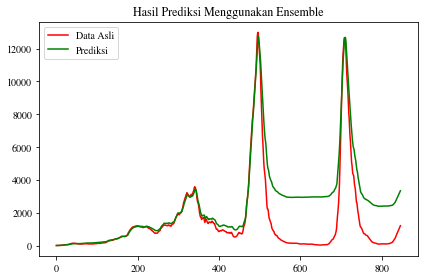

In [ ]:
covid_pred = from_growth_create_covid_data(ensemble_models, y_covid_data, x, n)
compare_covid_plot(tanggal, y_covid_data, covid_pred, title = "Hasil Prediksi Menggunakan Ensemble")

In [ ]:
stack_models = get_stacking(base_models)

In [ ]:
train_model(stack_models, x_train, y_train)

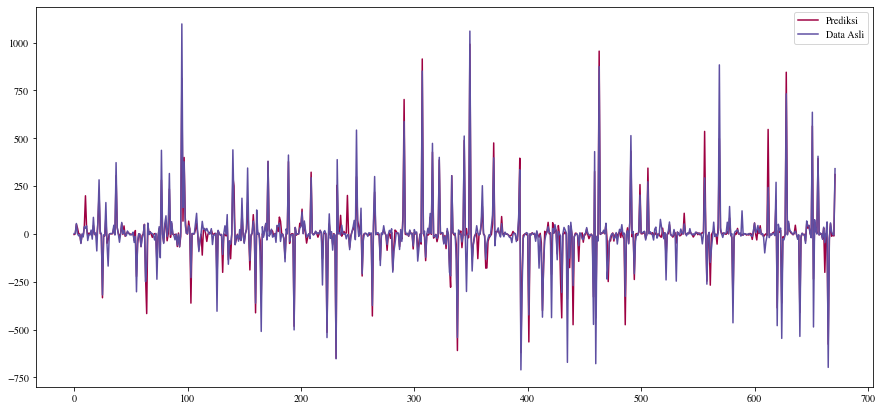

In [ ]:
show_pred_plot(stack_models, x_train, y_train)

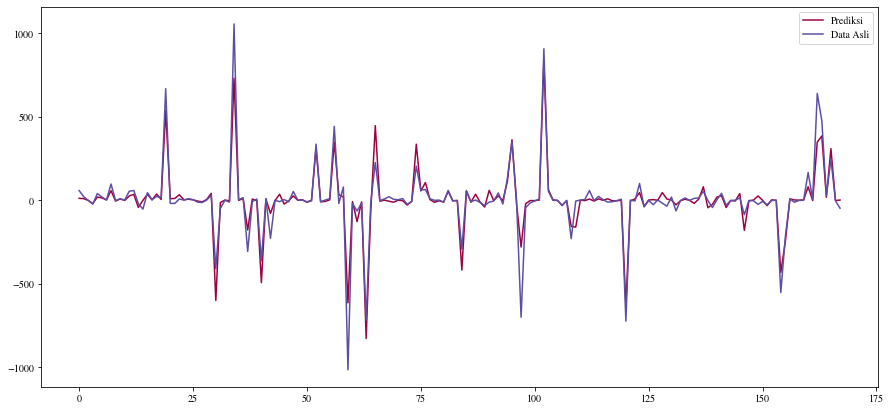

In [ ]:
show_pred_plot(stack_models, x_test, y_test)

In [ ]:
test_scores(stack_models, x_test, y_test)

Mean Absolute Error (MAE): 34.53711838251688
Mean squared Error (MSE): 5343.580959331551
Root Mean squared Error (RMSE): 73.09980136314702


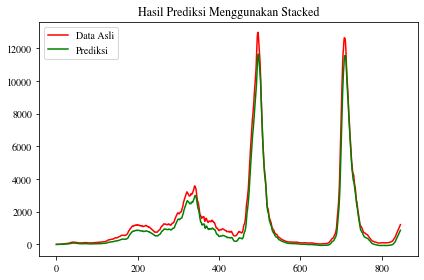

In [ ]:
covid_pred = from_growth_create_covid_data(stack_models, y_covid_data, x, n)
compare_covid_plot(tanggal, y_covid_data, covid_pred, title = "Hasil Prediksi Menggunakan Stacked")

Dari Semua model yang telah ditrain, model yang terbaik adalah elastic net optimized

# E. FORECAST




In [255]:
def calculateNdaysBefore(n, y):
  len_data = np.shape(y)[0]
  weight = np.array([1 / (i**2) for i in range(n, 0, -1)])
  normalisation = 1 / weight.sum()
  weight = normalisation * weight
  y_new = [((weight * y[i - n : i]).sum()) for i in range(n, len_data)]
  return np.array(y_new)

In [256]:
def weightedAverage(growth_data, weight):
  return (weight * growth_data).sum()

def calculateAccelAvg(growth_data, weight):
    avg = []
    n = np.shape(growth_data)[0]
    for j in range(0, n - 1):
      avg.append(growth_data[j + 1] - growth_data[j])

    avg = (np.array(avg) * weight[1:]).sum()
    return avg

def nDaysAvgForecast(model, base_growth, n_forecast, n):
  # tentukan growth avg pada hari pertama
  # dari growth tersebut, tnetukan growth_days_avg untuk digunakan mencari growth hari berikutnya

  # weight
  weight = np.array([1 / (i**2) for i in range(n, 0, -1)])
  normalisation = 1 / weight.sum()
  weight = normalisation * weight
  growth_forecast = []

  for i in range(n_forecast):
    base_growth_days_avg = weightedAverage(base_growth, weight)
    accel = calculateAccelAvg(base_growth, weight)
    # remoe 0th index data
    base_growth = np.delete(base_growth, 0)

    # predict
    x = np.array([base_growth_days_avg, accel]).reshape(1, -1)
    forecast = model.predict(x)[0]

    growth_forecast.append(forecast)
    base_growth = np.append(base_growth, forecast)

  return growth_forecast


def covidForecast(y_covid, growth):
  return from_growth_create_covid_data(
      None, y_covid, [], 
      n, isForecast = True, n_forecast = n_forecast, growth = growth)
  
  

In [257]:
# model yang baik adalah enet
model = enet_best

In [258]:
n_forecast = 50

In [259]:
# ambil n data terakhir
last_tanggal = tanggal[-1]
covid_data_pred = y_covid_data[np.shape(growth)[0] - n:np.shape(growth)[0]]
growth_pred = growth[np.shape(growth)[0] - n:np.shape(growth)[0]]
tanggal_pred = [last_tanggal + i for i in range(1, n_forecast + 1)]

In [260]:
p = nDaysAvgForecast(model, growth_pred, n_forecast, n)

In [261]:
covid_pred = covidForecast(covid_data_pred, p)

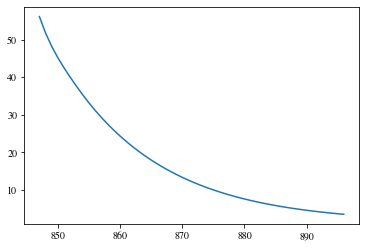

In [262]:
plt.plot(tanggal_pred, p)

Terlihat bahwa nilai growth mengikuti plot exponential decay, dan terlihat bahwa semakin besar waktu, growth akan mendekati ke nilai sekitar 0. Sehingga, setelah sampai puncak, tidak dapat memprediksi covid dengan baik

In [263]:
tanggal_new = np.hstack([tanggal, tanggal_pred])
covid_new = np.hstack([y_covid_data, covid_pred])

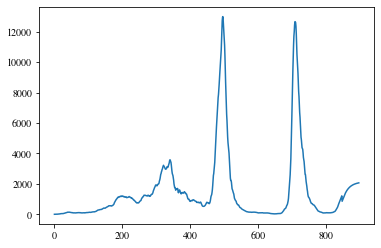

In [264]:
plt.plot(tanggal_new, covid_new)

Model yang dipakai memiliki kekurangan tidak dapat memprediksi penurunan covid dari puncak.

# F. CONCLUSION

Berdasarkan analisis data yang diperoleh di atas, dapat disimpulkan hasil-hasil sebagai berikut.

1. Hasil visualisasi perkembangan wabah COVID-19 terdapat pada Bagian C. 

2. Korelasi antara perkembangan vaksinasi dan perkembangan & penanggulangan COVID-19 terdapat pada bagian D.

3. Setelah membandingkan beberapa model pada bagian D., diperoleh bahwa Elastic Net adalah model terbaik untuk memprediksi perkembangan COVID-19.

4. Hasil forecasting COVID-19 terdapat pada bagian E.

Beberapa hal yang harus diperhatikan adalah bahwa tujuan dari notebook ini adalah untuk memberikan wawasan tentang penularan COVID-19 dari prespektif data-sentris dengan cara yang sederhana. Hasil yang diprediksi tidak boleh dianggap sebagai penegasan tentang apa yang akan terjadi di masa depan. Model prediktif ini dapat digunakan untuk beberapa tujuan, tetapi model ini tidak dapat menggantikan rekomendasi para ahli COVID-19. Hal ini disebabkan karena keberhasilan prediksi ini bergantung pada banyak variabel lainnya seperti kualitas karantina, kualitas sumber daya medis yang dikerahkan, dan tindakan masyarakat. 

# F. DAFTAR PUSTAKA

Dataset. https://github.com/AdityaP1502/Seleksi-Compfest-2022

Facebook (2021). Facebook Prophet Quick Start.  https://facebook.github.io/prophet/docs/quick_start.html

Josef Perktold, Skipper Seabold, Jonathan Taylor (2022). Statsmodels Documentation. https://www.statsmodels.org/dev/index.html

Stacking Ensemble Machine Learning With Python. https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/

A. Géron, Hands-on machine learning with Scikit-Learn, Keras and TensorFlow, 2nd ed. Beijing: O'Reilly, 2020, pp. 53, 73 - 75, 76 - 77.